# Section: Importing modules

In [1]:
import operator
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import display
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell

sys.path.append(str(Path('.').absolute().parent))

from include.config import CleaningConfig, PlottingConfig, NotebookConfig
from include.counting import get_count, get_percentage
from include.plotting import get_plot, display_side_by_side
from include.likertScalePlot import likert_scale
from include.textCleaning import wordcloud

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 
InteractiveShell.ast_node_interactivity = "all" 

This text is used to hide the code cell when exported in html

In [3]:
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (18.0, 8.0)

# Loading dataset
To find the total number of participants, we took all submissions and then removed those from people who were outside the country (see question 1) and those from people who had not completed the first ten questions (i.e. those people who did not complete the first page of the survey).

In [5]:
df =  pd.read_csv('./zaf/data/cleaned_data.csv')

The total of participant after cleaning the dataset. Remove all participants that have not completed the survey passed the first pages and all participants who are not from the country

In [6]:
print('The total number of particants in this study: {}'.format(len(df)))

The total number of particants in this study: 22


# Section 1. Social demographic
In this section, we determine some information about the demographics of the respondents: country of work, qualification, gender, age, ethnic origin, salary, and disabilities.


## Country of work
The data was cleaned to remove all participants that were not working in South Africa.


### In which country do you work?

In [7]:
v_to_count, filename  = get_count(df, ['socio1. In which country do you work?'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/countries.csv", "False", "./zaf/output/")

In [8]:
perc_to_count = get_percentage(v_to_count, filename)

In [9]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
In which country do you work?,,
South Africa,22,100


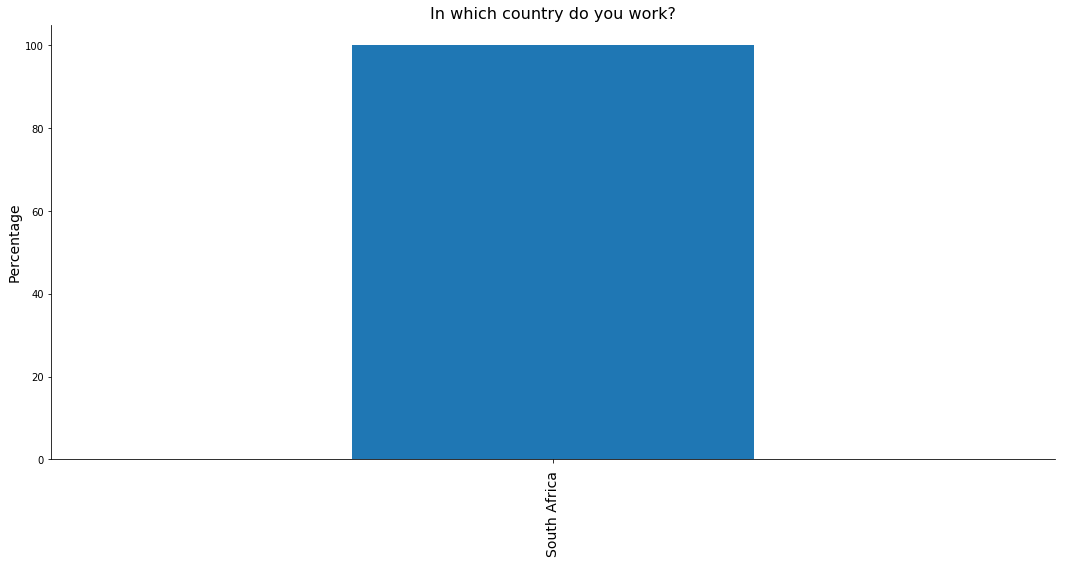

In [10]:
_ = get_plot(perc_to_count, "one choice")

## Qualifications
The highest proportion of RSEs hold a *doctorate* (68%) as their highest qualification but only by a margin when compared to *master degree* (23%).

Most RSEs derive from a background in *Physics and Astronomy* (55%). None of the other field contain more than 1 participant (except the possibility *Other*).


### What is the highest qualification you have obtained?

In [11]:
v_to_count, filename  = get_count(df, ['edu1. What is the highest qualification you have obtained?'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/education.csv", "False", "./zaf/output/")

In [12]:
perc_to_count = get_percentage(v_to_count, filename)

In [13]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What is the highest qualification you have obtained?,,
Doctorate,15,68
Master degree,5,23
Honours degree,1,5
"Further Education (National Diploma, Advanced certificates, Higher Certificates, Advanced National (vocational) Certificate, ...)",1,5


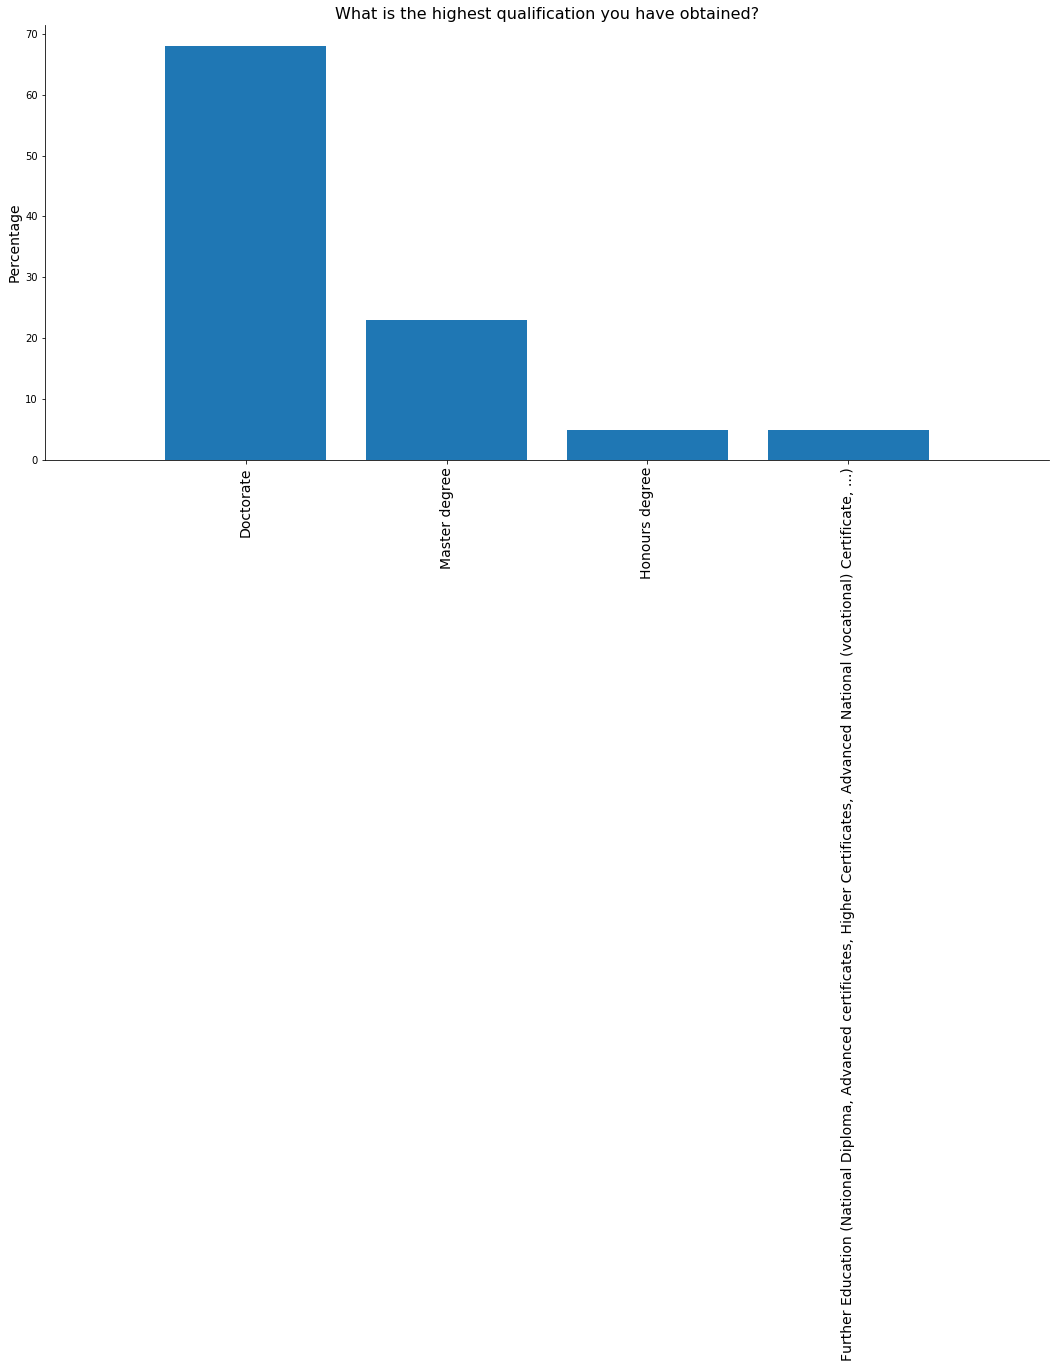

In [14]:
_ = get_plot(perc_to_count, "one choice")

### In which subject is your highest academic qualification?

In [15]:
v_to_count, filename  = get_count(df, ['edu2. In which subject is your highest academic qualification?'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/academic_field.csv", "False", "./zaf/output/")

In [16]:
perc_to_count = get_percentage(v_to_count, filename)

In [17]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
In which subject is your highest academic qualification?,,
Physics and Astronomy,12,55
Other,2,9
Chemistry,1,5
Computer Science,1,5
African languages,1,5
Mechanical Engineering,1,5
Biological Sciences,1,5
Electrical & Electronic Engineering,1,5
Economics,1,5


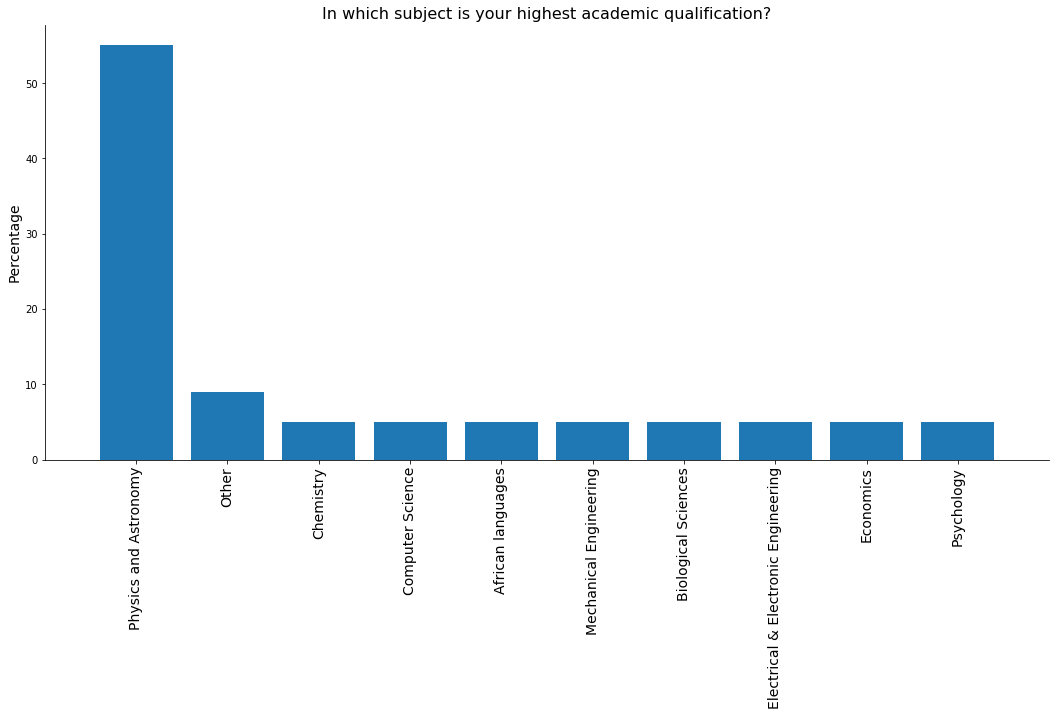

In [18]:
_ = get_plot(perc_to_count, "one choice")

## Gender
Only one participants answered *Female* to the question of gender while 92% of the participant (n=12) reported to be *Male*. 9 (over 22) participants did not answer that question.


### Please select your gender

In [19]:
v_to_count, filename  = get_count(df, ['socio2. Please select your gender'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/gender.csv", "False", "./zaf/output/")

In [20]:
perc_to_count = get_percentage(v_to_count, filename)

In [21]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select your gender,,
Male,12,92
Female,1,8
NaN,9,NaN


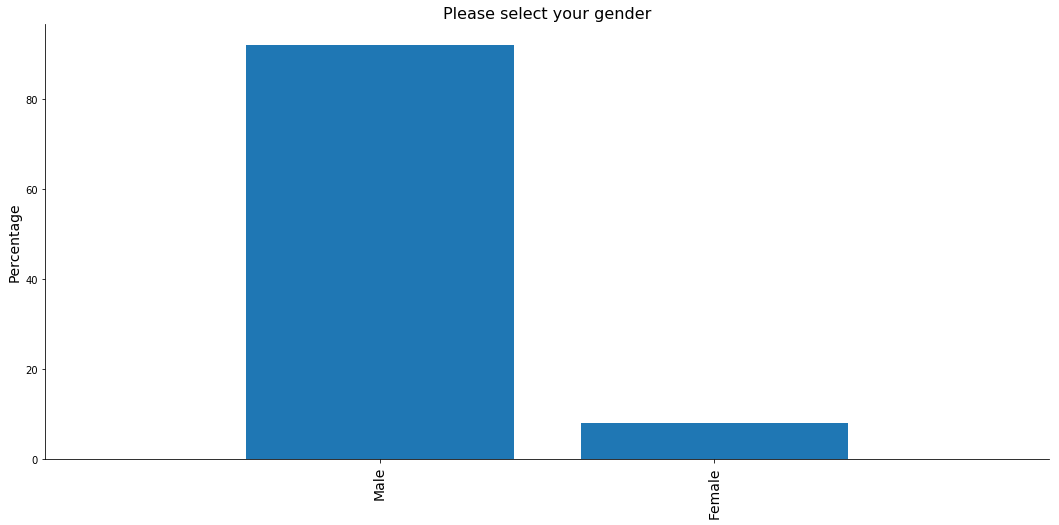

In [22]:
_ = get_plot(perc_to_count, "one choice")

## Age
The age of the participants are concentrated in the two lowest age ranges, the *25 to 34 years* (38%, n=5) and the *35 to 44 years* (38%, N=5).


### Please select your age

In [23]:
v_to_count, filename  = get_count(df, ['socio3. Please select your age'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/age.csv", "True", "./zaf/output/")

In [24]:
perc_to_count = get_percentage(v_to_count, filename)

In [25]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select your age,,
25 to 34 years,5,38
35 to 44 years,5,38
45 to 54 years,2,15
Age 65 or older,1,8
NaN,9,NaN


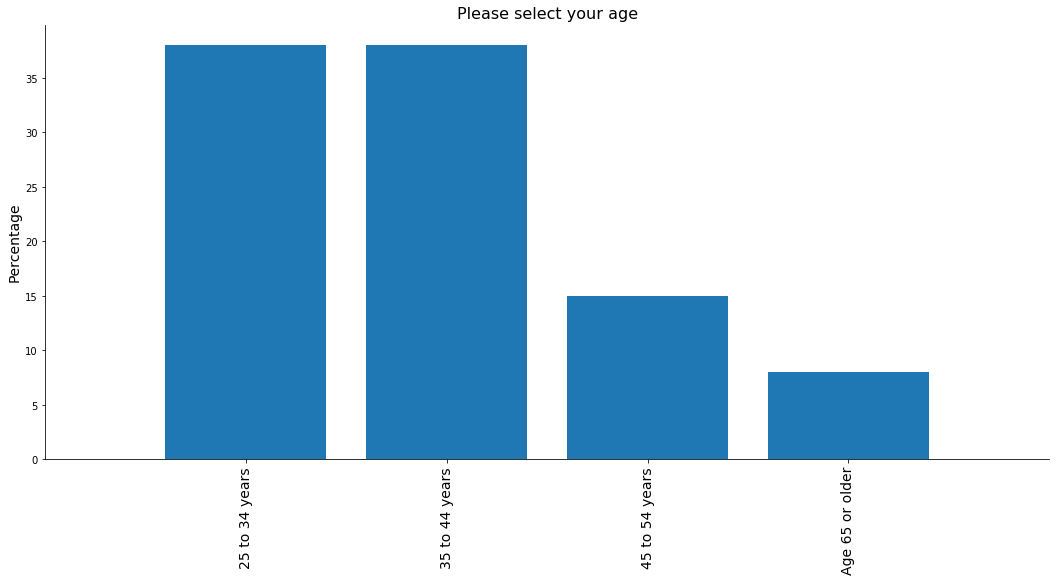

In [26]:
_ = get_plot(perc_to_count, "one choice")

## Ethnic origin
The participants are predominantly white (92%, n=12), only one participant reported being black.


### How would you describe your ethnic origin? This refers to people who share the same cultural background and identity, not country of birth or nationality.

In [27]:
v_to_count, filename  = get_count(df, ['socio5. How would you describe your ethnic origin? This refers to people who share the same cultural background and identity, not country of birth or nationality.'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/ethnicity.csv", "False", "./zaf/output/")

In [28]:
perc_to_count = get_percentage(v_to_count, filename)

In [29]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
"How would you describe your ethnic origin? This refers to people who share the same cultural background and identity, not country of birth or nationality",,
White,11,92
Black,1,8
NaN,10,NaN


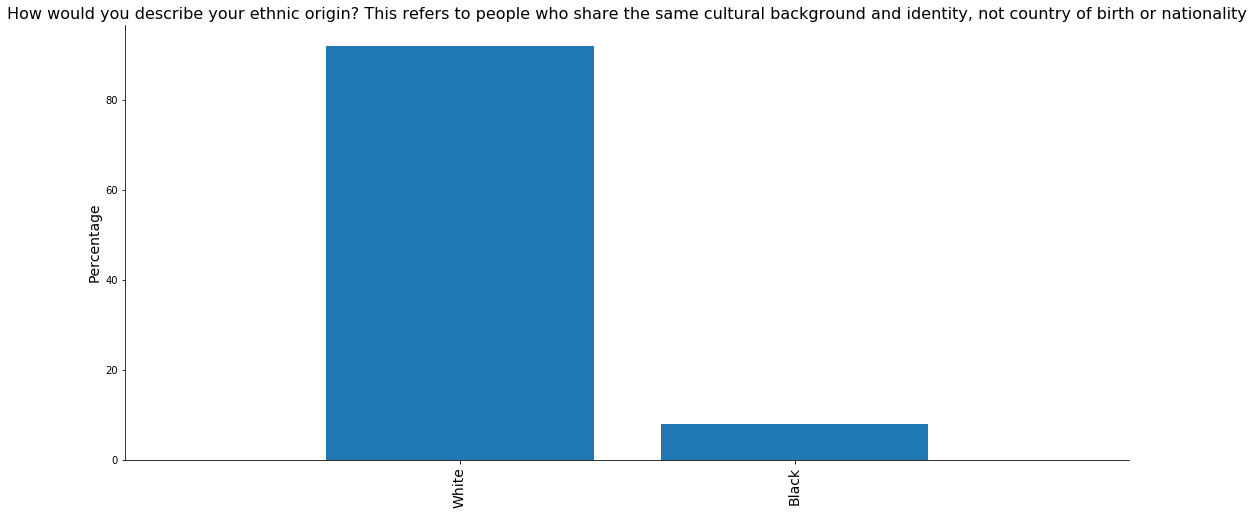

In [30]:
_ = get_plot(perc_to_count, "one choice")

## Salary
Almost half of the RSE in South Africa earn *Between R 708 311 and R 1 500 000* (46%, n=6), while the second highest range of salary is *Between R 296 541 and R 410 460* (23%, n=3).


### Please select the range of your annual salary

In [31]:
v_to_count, filename  = get_count(df, ['socio4. Please select the range of your annual salary'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/salary.csv", "True", "./zaf/output/")

In [32]:
perc_to_count = get_percentage(v_to_count, filename)

In [33]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select the range of your annual salary,,
Less than R 189 880,2,15
Between R 296 541 and R 410 460,3,23
Between R 555 601 and R 708 310,1,8
Between R 708 311 and R 1 500 000,6,46
More than R 1 500 000,1,8
NaN,9,NaN


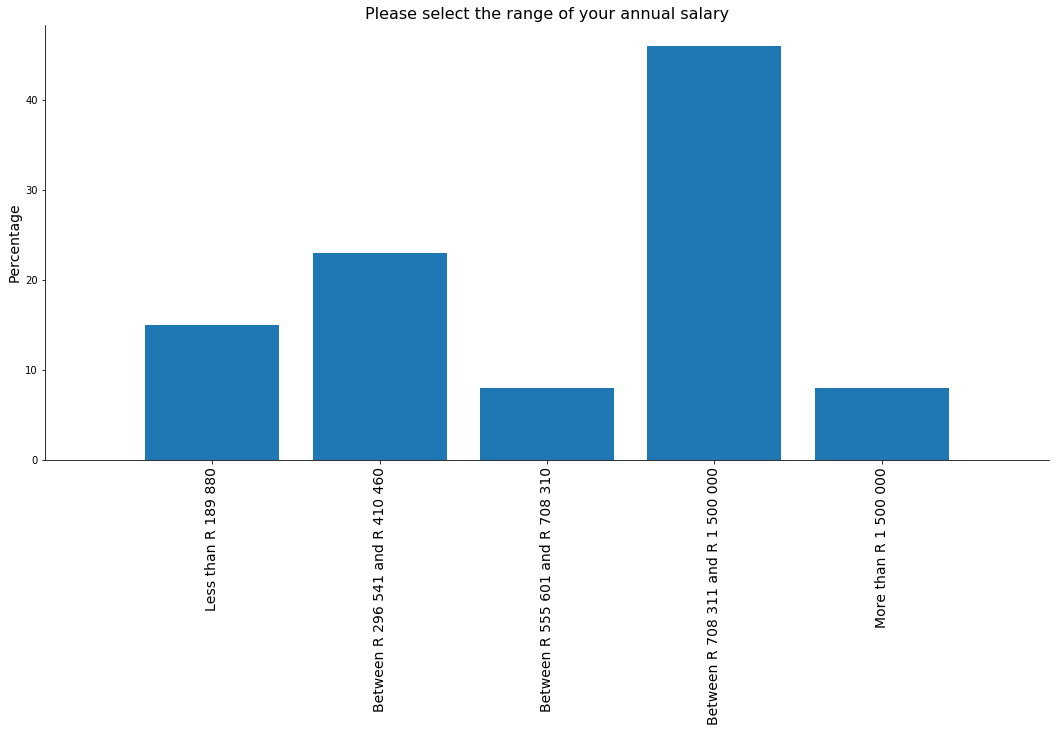

In [34]:
_ = get_plot(perc_to_count, "one choice")

## Disability
No participant reported any form of disability.


### Do you have a condition that is defined as a disability by the White Paper on the Rights of Persons with Disabilities (2015)

In [35]:
v_to_count, filename  = get_count(df, ['disa1. Do you have a condition that is defined as a disability by the White Paper on the Rights of Persons with Disabilities (2015)'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [36]:
perc_to_count = get_percentage(v_to_count, filename)

In [37]:
display_side_by_side(v_to_count,perc_to_count)

,No [Count],Yes [Count],No [Percentage],Yes [Percentage]
Do you have a condition that is defined as a disability by the White Paper on the Rights of Persons with Disabilities (2015),,,,
Do you have a condition that is defined as a disability by the White Paper on the Rights of Persons with Disabilities (2015),11,0,100,0


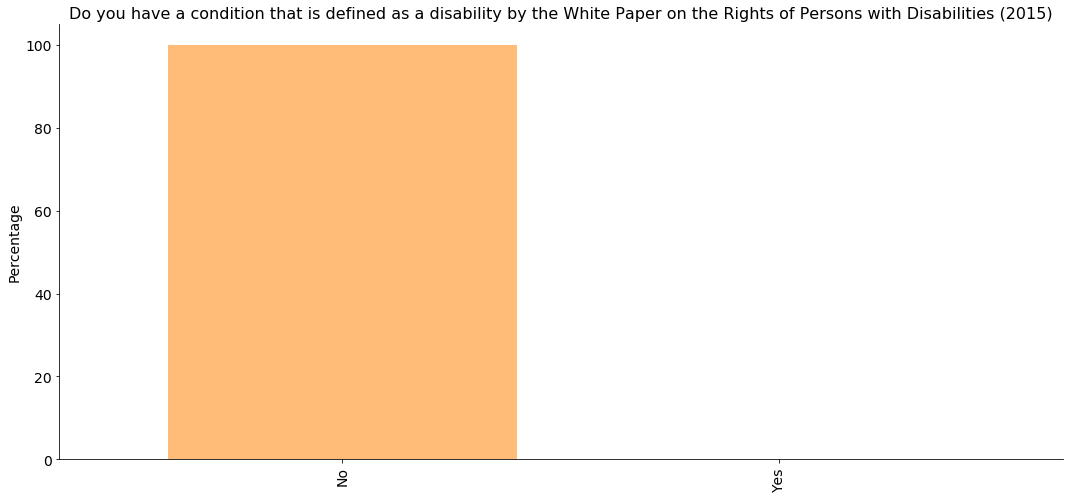

In [38]:
_ = get_plot(perc_to_count, "y/n/na")

## Professional qualifications

### Do you hold any other professional degrees/qualifications? (Please enter each of them separated by a semicolon)

In [39]:
data = df['edu4. Do you hold any other professional degrees/qualifications? (Please enter each of them separated by a semicolon)'].dropna()
data = [z.replace('/', ';').replace(',', ';').replace('-', ' ').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(';') if len(z.strip()) > 2]
print('There are {} propositions'.format(len(data)))

There are 4 propositions


In [40]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4:
        print(k[0].title(), k[1])

Msc (Electronic Engineering) 1
Beng (Electrical & Electronic) 1
Registered Educational Counsellor 1


In [41]:
wc = wordcloud(df, ['edu4. Do you hold any other professional degrees/qualifications? (Please enter each of them separated by a semicolon)'])

(-0.5, 1499.5, 799.5, -0.5)

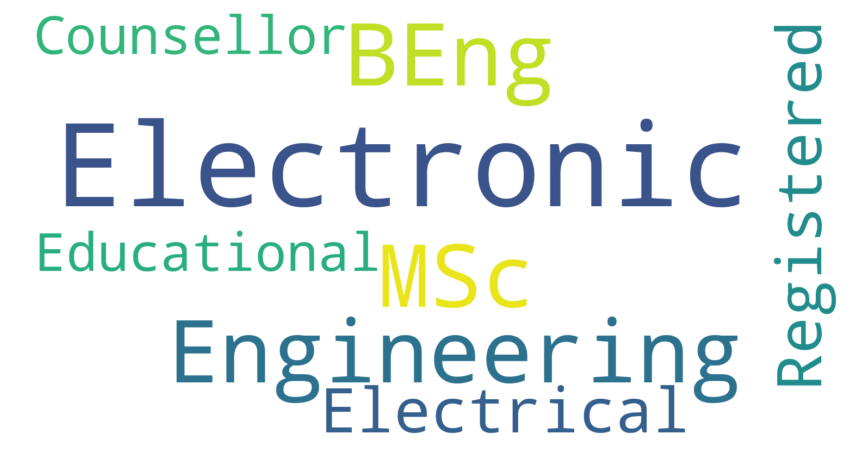

In [42]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Section 2: Questions about coding
In this section we investigate the relationship between RSEs and the code they develop.

As expected, the vast majority of RSEs (86%, n=19) write code. 15% (n=3) of the participants write code for themselves while the vast majority write code for other people (85%, n=17).

However, despite the majority of them writing code, only 23% (n=5) consider themselves as *professional software developer*. This is a low number when we consider the average time of developing software (14 years) and that they are mainly developing software for others.

Surprisingly, the participants do not spend much of their time coding, but doing research. Software development come only second in the most time consuming task. The second type of question asked if the participants wanted to spend more time than what they do. Here again, the participants seems to want to spend more time doing research. Again, software development comes second. They are mainly coming from the North-West University and the University of Pretoria (40%, n=4 and 20%, n=2) but 12 participants did not answer to that question.


### Do you write code as part of your job?

In [43]:
v_to_count, filename  = get_count(df, ['rse1. Do you write code as part of your job?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [44]:
perc_to_count = get_percentage(v_to_count, filename)

In [45]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],Yes [Percentage],No [Percentage]
Do you write code as part of your job?,,,,
Do you write code as part of your job?,19,3,86,14


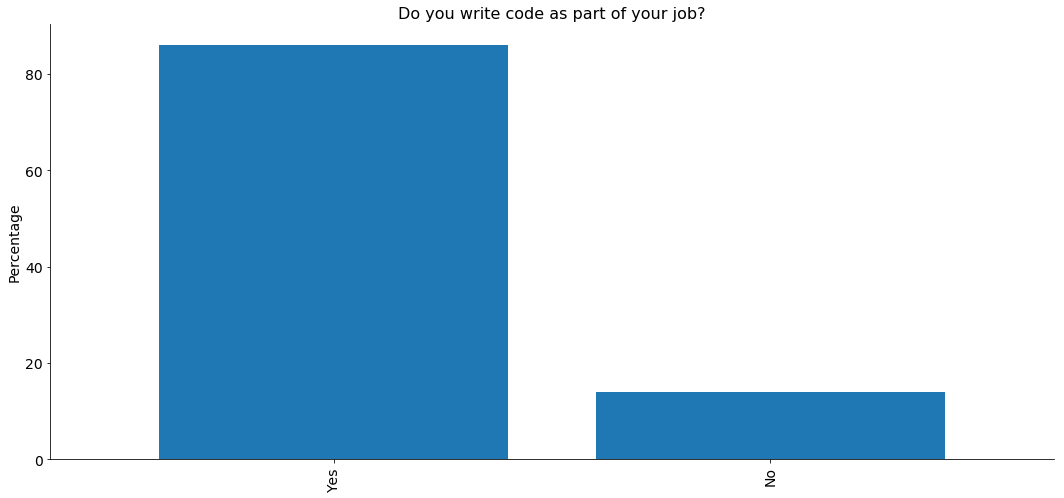

In [46]:
_ = get_plot(perc_to_count, "y/n/na")

### Who uses the code that you write?

In [47]:
v_to_count, filename  = get_count(df, ['rse3[SQ001]. Who uses the code that you write? []'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_usage_5.csv", "True", "./zaf/output/")

In [48]:
perc_to_count = get_percentage(v_to_count, filename)

In [49]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Who uses the code that you write?,,
0 - Mostly me,3,15
1,6,30
2,4,20
3,4,20
4,1,5
5 - Mostly other people,2,10


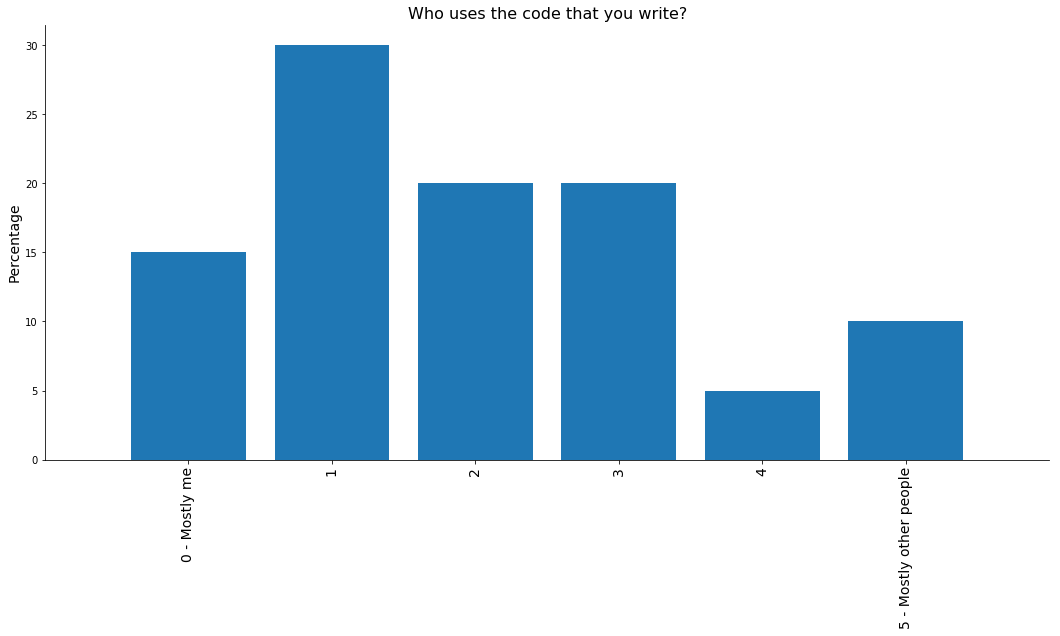

In [50]:
_ = get_plot(perc_to_count, "likert")

### Do you consider yourself a professional software developer?

In [51]:
v_to_count, filename  = get_count(df, ['soft2can. Do you consider yourself a professional software developer?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [52]:
perc_to_count = get_percentage(v_to_count, filename)

In [53]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],Yes [Percentage],No [Percentage]
Do you consider yourself a professional software developer?,,,,
Do you consider yourself a professional software developer?,5,17,23,77


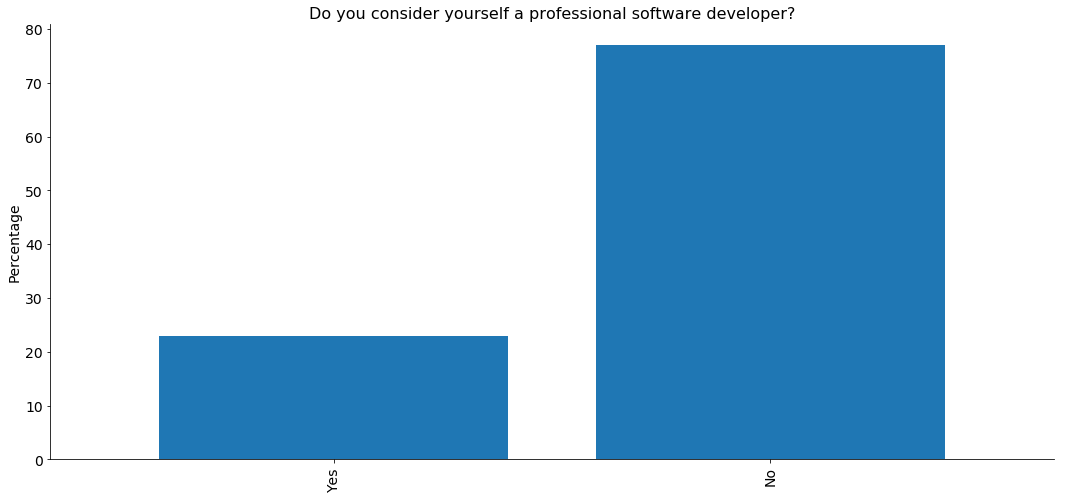

In [54]:
_ = get_plot(perc_to_count, "y/n/na")

### How many years of Software development experience do you have?

In [55]:
v_to_count, filename  = get_count(df, ['soft1can. How many years of Software development experience do you have?'], "freenumeric", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

       soft1can. How many years of Software development experience do you have?
count                                          22.000000                       
mean                                           14.681818                       
std                                            13.148914                       
min                                             0.000000                       
25%                                             3.250000                       
50%                                            11.000000                       
75%                                            21.500000                       
max                                            42.000000                       


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


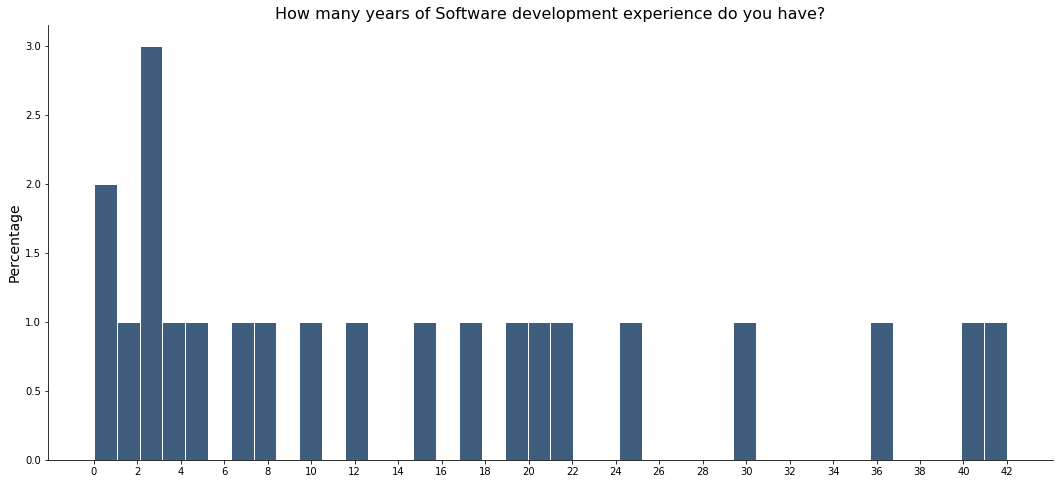

In [56]:
_ = get_plot(v_to_count, "freenumeric")

### In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.); In an average month, how much time do you spend on Research; In an average month, how much time do you spend on Management; In an average month, how much time do you spend on Teaching; In an average month, how much time do you spend on Other activities

In [57]:
v_to_count, filename  = get_count(df, ['likert0[time1can]. [In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)]', 
 'likert0[time2can]. [In an average month, how much time do you spend on Research]', 
 'likert0[time3can]. [In an average month, how much time do you spend on Management]', 
 'likert0[time4can]. [In an average month, how much time do you spend on Teaching]', 
 'likert0[time5can]. [In an average month, how much time do you spend on Other activities]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_time_10.csv", "False", "./zaf/output/")

In [58]:
display(v_to_count) 

,"In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)","In an average month, how much time do you spend on Research","In an average month, how much time do you spend on Management","In an average month, how much time do you spend on Teaching","In an average month, how much time do you spend on Other activities"
Spending time,,,,,
1 (Never),2.0,NaN,5.0,5.0,3.0
2,4.0,3.0,4.0,9.0,3.0
3,3.0,6.0,8.0,3.0,5.0
4,3.0,4.0,1.0,3.0,4.0
5,3.0,NaN,NaN,NaN,6.0
6,4.0,2.0,NaN,NaN,NaN
7,1.0,1.0,3.0,1.0,1.0
8,1.0,1.0,NaN,1.0,NaN
9,NaN,1.0,1.0,NaN,NaN


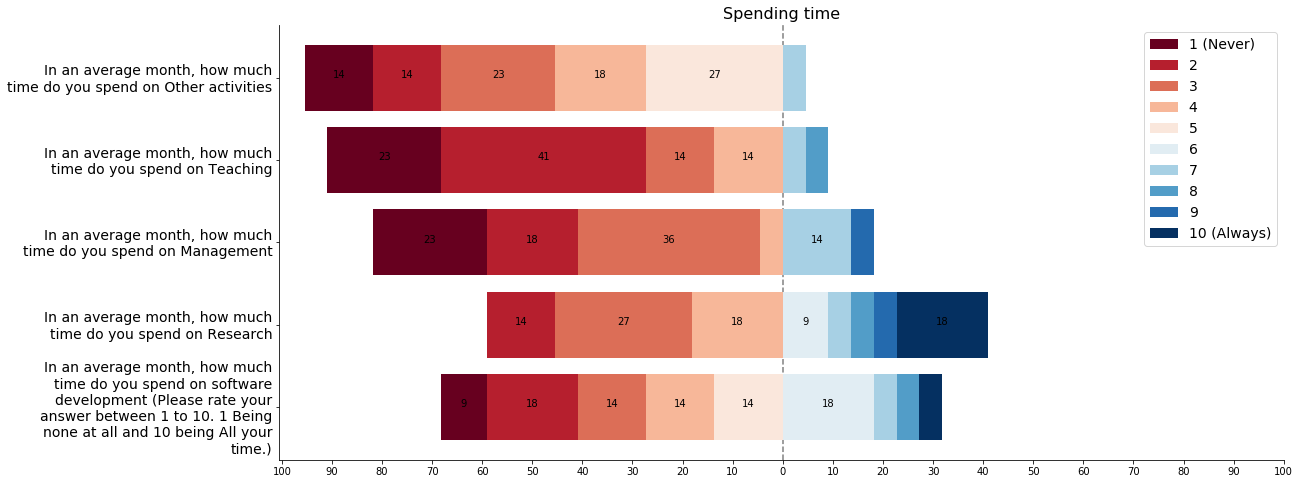

In [59]:
_ = get_plot(v_to_count, "likert")

### In an average month, how much time would you like to spend on programming? (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.); In an average month, how much time would you like to spend on Research; In an average month, how much time would you like to spend on Management; In an average month, how much time would you like to spend on Teaching

In [60]:
v_to_count, filename  = get_count(df, ['likert0[time6zaf]. [In an average month, how much time would you like to spend on programming? (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)]', 
 'likert0[time7zaf]. [In an average month, how much time would you like to spend on Research]', 
 'likert0[time8zaf]. [In an average month, how much time would you like to spend on Management]', 
 'likert0[time9zaf]. [In an average month, how much time would you like to spend on Teaching]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_time_10.csv", "False", "./zaf/output/")

In [61]:
df['likert0[time6zaf]. [In an average month, how much time would you like to spend on programming? (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)]']

How many years of Software development experience do you have?
0     2
1     6
2     6
3     8
4     8
5     3
6     2
7     4
8     7
9     5
10    9
11    5
12    5
13    6
14    2
15    3
16    4
17    3
18    4
19    4
20    9
21    6
Name: likert0[time6zaf]. [In an average month, how much time would you like to spend on programming? (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)], dtype: int64

In [62]:
display(v_to_count) 

,"In an average month, how much time would you like to spend on programming? (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)","In an average month, how much time would you like to spend on Research","In an average month, how much time would you like to spend on Management","In an average month, how much time would you like to spend on Teaching"
,,,,
1 (Never),NaN,NaN,9.0,5.0
2,3.0,2.0,4.0,3.0
3,3.0,2.0,4.0,3.0
4,4.0,2.0,1.0,5.0
5,3.0,2.0,1.0,2.0
6,4.0,2.0,NaN,1.0
7,1.0,2.0,1.0,NaN
8,2.0,5.0,2.0,3.0
9,2.0,1.0,NaN,NaN


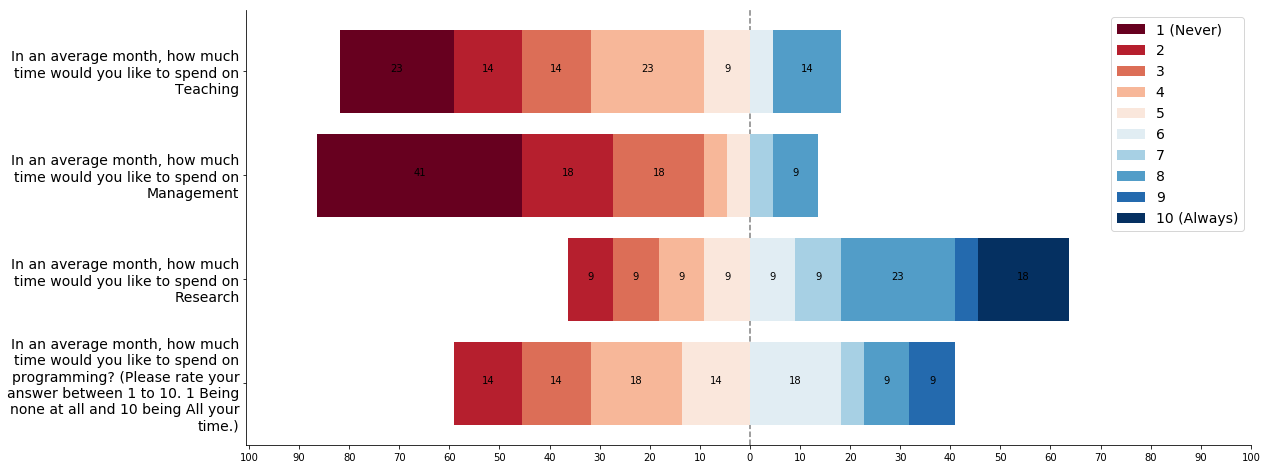

In [63]:
_ = get_plot(v_to_count, "likert")

# Section 3: Questions about employment
The participants work principally for an university (45%, n=10) and for research organisation (32%, n=7).
They work in more different field than they come from. The majority still works in Physics and Astronomy (29%, n=12) but several of them are working in Computer Science (12%, n=5), Mathematics (10%, n=4) and Education (7%, n=3).


### What type of organisation do you work for?

In [64]:
v_to_count, filename  = get_count(df, ['currentEmp1. What type of organisation do you work for?'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/type_organisation.csv", "False", "./zaf/output/")

In [65]:
perc_to_count = get_percentage(v_to_count, filename)

In [66]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What type of organisation do you work for?,,
University,10,45
"Research Organisation (e.g. SKA, HartRAO, SAEON, SANSA, ...)",7,32
Other,2,9
Start-up Company,1,5
Private Company,1,5
Research Council,1,5


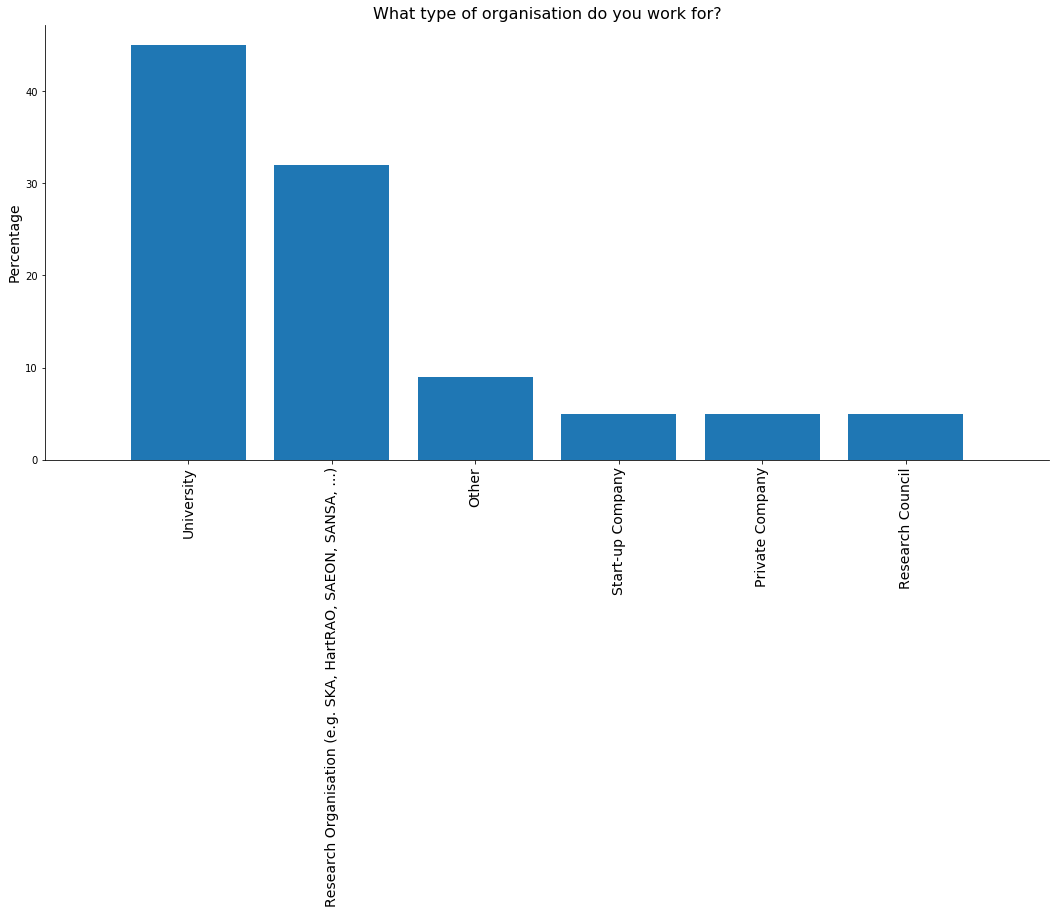

In [67]:
_ = get_plot(perc_to_count, "one choice")

### Which University? Please please provide the full official name of the university or organisation e.g. University of Cape Town if your organisation is not listed

In [68]:
v_to_count, filename  = get_count(df, ['currentEmp2. Which University? Please please provide the full official name of the university or organisation e.g. University of Cape Town if your organisation is not listed'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/universities.csv", "False", "./zaf/output/")

In [69]:
perc_to_count = get_percentage(v_to_count, filename)

In [70]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Which University? Please please provide the full official name of the university or organisation e,,
North-West University,4,40
University of Pretoria,2,20
University of the Witwatersrand,1,10
University of Cape Town,1,10
University of KwaZulu-Natal,1,10
University of the Western Cape,1,10
NaN,12,NaN


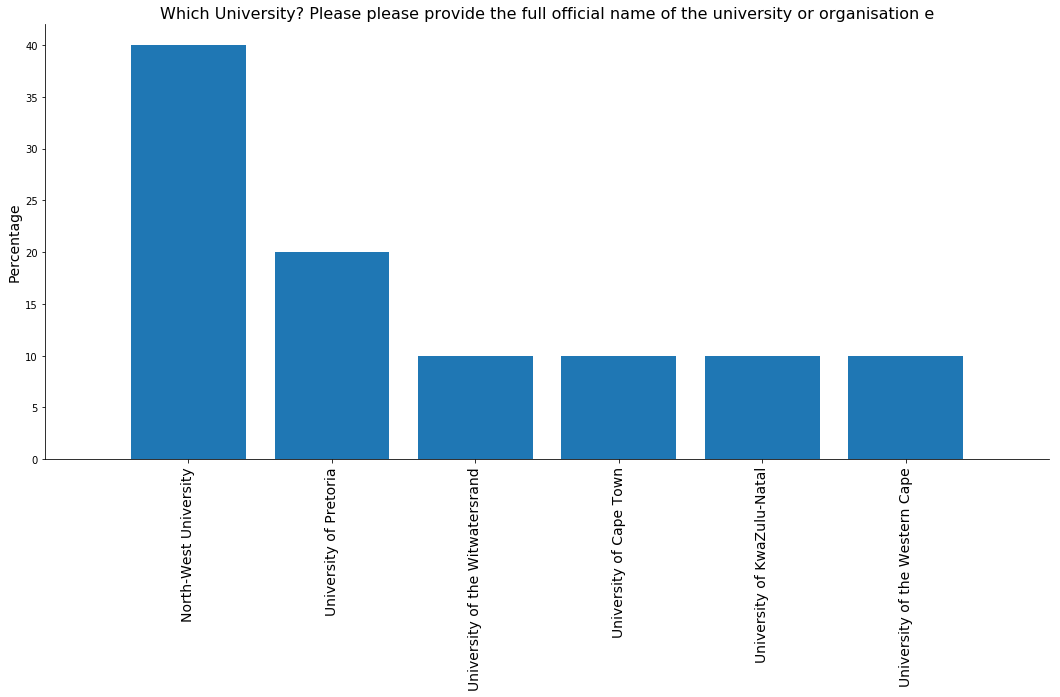

In [71]:
_ = get_plot(perc_to_count, "one choice")

### Which organisation do you work for?

In [72]:
data = df['currentEmp4. Which organisation do you work for?'].dropna()
data = [z.replace('/', ';').replace(',', ';').replace('-', ' ').strip().lower() for z in data]
print('There are {} propositions'.format(len(data)))
data = [z.strip() for i in data for z in i.split(';') if len(z.strip()) > 2]

There are 12 propositions


In [73]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4:
        print(k[0].title(), k[1])

Sansa 1
Exegetic Analytics 1
South African Astronomical Observatory 1
Sarao  (Ska) 1
Ska Africa 1
Sarao 1
Sasol 1
North West University 1


In [74]:
 wc = wordcloud(df, ['currentEmp4. Which organisation do you work for?'])

(-0.5, 1499.5, 799.5, -0.5)

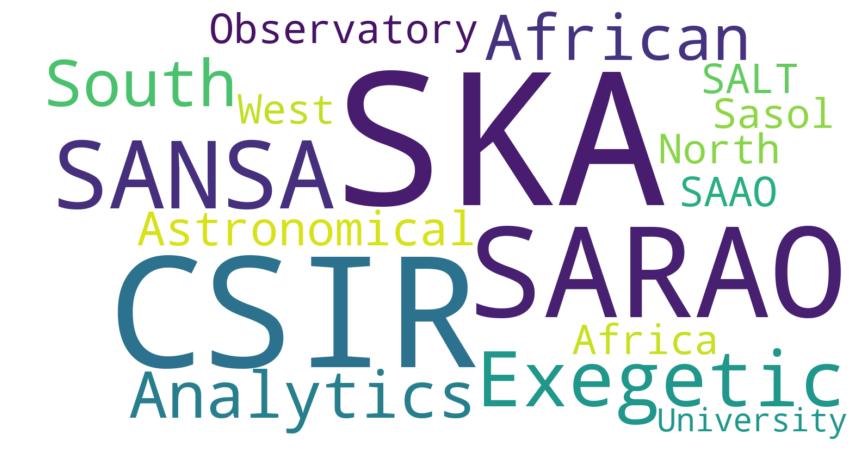

In [75]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### What is your official job title?

In [76]:
data = df['currentEmp5. What is your official job title?'].dropna()
data = [z.replace('/', ';').replace(',', ';').replace('-', ' ').strip().lower() for z in data]
print('There are {} propositions'.format(len(data)))
data = [z.strip() for i in data for z in i.split(';') if len(z.strip()) > 2]

There are 22 propositions


In [77]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4:
        print(k[0].title(), k[1])

Research Scientist 2
Senior Lecturer 2
Postdoctoral Research Fellow 2
Doctor 1
Lecturer 1
Phd Student 1
Data Scientist 1
Junior Infrastructure Architect 1
Honarary Researcher 1
Senior Scientific Sofwtare Engineer 1
Commissioning Scientist 1
Senior Science Processing Developer 1
Salt Astronomer 1
Senior Scientist 1
Managing Director 1
Software Developer 1
Professor 1
Research Assistant 1
Ph.D. Student 1


In [78]:
 wc = wordcloud(df, ['currentEmp5. What is your official job title?'])

(-0.5, 1499.5, 799.5, -0.5)

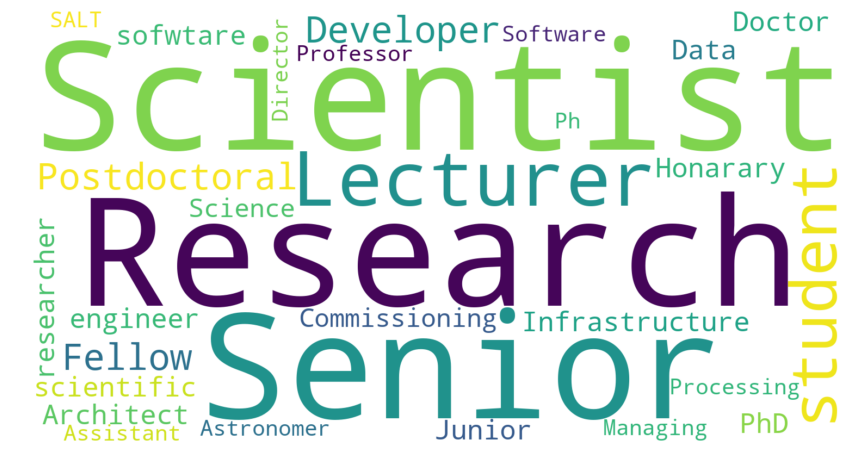

In [79]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Are you known by a different job title? If so, please enter the job title you use

In [80]:
data = df['currentEmp6. Are you known by a different job title? If so, please enter the job title you use'].dropna()
data = [z.replace('/', ';').replace(',', ';').replace('-', ' ').strip().lower() for z in data]
print('There are {} propositions'.format(len(data)))
data = [z.strip() for i in data for z in i.split(';') if len(z.strip()) > 2]

There are 21 propositions


In [81]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4:
        print(k[0].title(), k[1])

Slave 1
Lecturer 1
Postdoc 1
Data Scientist 1
Manager: Resource Development 1
Commissioning Scientist 1
General Guru 1
Director 1
Nobut It'S Not Entirely Accurate Title For My Role 1
Phd Student 1


In [82]:
 wc = wordcloud(df, ['currentEmp6. Are you known by a different job title? If so, please enter the job title you use'])

(-0.5, 1499.5, 799.5, -0.5)

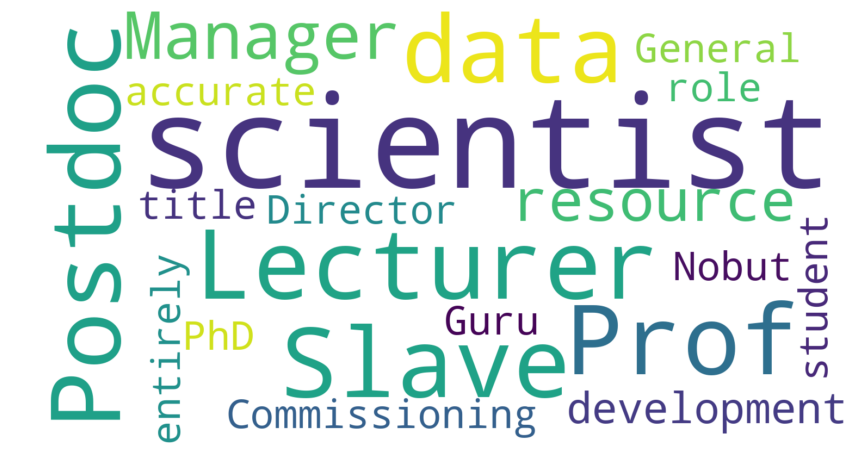

In [83]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### In which disciplines do you work (select as many as apply)

In [84]:
v_to_count, filename  = get_count(df, ['currentEmp13[1]. In which disciplines do you work (select as many as apply) [Accounting & Finance]', 'currentEmp13[2]. In which disciplines do you work (select as many as apply) [Aeronautical & Manufacturing Engineering]', 'currentEmp13[3]. In which disciplines do you work (select as many as apply) [African languages]', 'currentEmp13[4]. In which disciplines do you work (select as many as apply) [Agriculture & Forestry]', 'currentEmp13[5]. In which disciplines do you work (select as many as apply) [American Studies]', 'currentEmp13[6]. In which disciplines do you work (select as many as apply) [Anatomy & Physiology]', 'currentEmp13[7]. In which disciplines do you work (select as many as apply) [Anthropology]', 'currentEmp13[8]. In which disciplines do you work (select as many as apply) [Architecture]', 'currentEmp13[9]. In which disciplines do you work (select as many as apply) [Art & Design]', 'currentEmp13[10]. In which disciplines do you work (select as many as apply) [Biological Sciences]', 'currentEmp13[11]. In which disciplines do you work (select as many as apply) [Business & Management Studies]', 'currentEmp13[12]. In which disciplines do you work (select as many as apply) [Chemical Engineering]', 'currentEmp13[13]. In which disciplines do you work (select as many as apply) [Chemistry]', 'currentEmp13[14]. In which disciplines do you work (select as many as apply) [Civil Engineering]', 'currentEmp13[15]. In which disciplines do you work (select as many as apply) [Classics & Ancient History]', 'currentEmp13[16]. In which disciplines do you work (select as many as apply) [Communication & Media Studies]', 'currentEmp13[17]. In which disciplines do you work (select as many as apply) [Complementary Medicine]', 'currentEmp13[18]. In which disciplines do you work (select as many as apply) [Computer Science]', 'currentEmp13[19]. In which disciplines do you work (select as many as apply) [Counselling]', 'currentEmp13[20]. In which disciplines do you work (select as many as apply) [Criminology]', 'currentEmp13[21]. In which disciplines do you work (select as many as apply) [Dentistry]', 'currentEmp13[22]. In which disciplines do you work (select as many as apply) [East & South Asian Studies]', 'currentEmp13[23]. In which disciplines do you work (select as many as apply) [Economics]', 'currentEmp13[24]. In which disciplines do you work (select as many as apply) [Education]', 'currentEmp13[25]. In which disciplines do you work (select as many as apply) [Electrical & Electronic Engineering]', 'currentEmp13[26]. In which disciplines do you work (select as many as apply) [English]', 'currentEmp13[27]. In which disciplines do you work (select as many as apply) [Fashion]', 'currentEmp13[28]. In which disciplines do you work (select as many as apply) [Food Science]', 'currentEmp13[29]. In which disciplines do you work (select as many as apply) [French]', 'currentEmp13[30]. In which disciplines do you work (select as many as apply) [Geography & Environmental Sciences]', 'currentEmp13[31]. In which disciplines do you work (select as many as apply) [Geology]', 'currentEmp13[32]. In which disciplines do you work (select as many as apply) [General Engineering]', 'currentEmp13[33]. In which disciplines do you work (select as many as apply) [German]', 'currentEmp13[34]. In which disciplines do you work (select as many as apply) [History]', 'currentEmp13[35]. In which disciplines do you work (select as many as apply) [History of Art, Architecture & Design]', 'currentEmp13[36]. In which disciplines do you work (select as many as apply) [Hospitality, Leisure, Recreation & Tourism]', 'currentEmp13[37]. In which disciplines do you work (select as many as apply) [Iberian Languages/Hispanic Studies]', 'currentEmp13[38]. In which disciplines do you work (select as many as apply) [Land & Property Management]', 'currentEmp13[39]. In which disciplines do you work (select as many as apply) [Law]', 'currentEmp13[40]. In which disciplines do you work (select as many as apply) [Librarianship & Information Management]', 'currentEmp13[41]. In which disciplines do you work (select as many as apply) [Linguistics]', 'currentEmp13[42]. In which disciplines do you work (select as many as apply) [Marketing]', 'currentEmp13[43]. In which disciplines do you work (select as many as apply) [Materials Technology]', 'currentEmp13[44]. In which disciplines do you work (select as many as apply) [Mathematics]', 'currentEmp13[45]. In which disciplines do you work (select as many as apply) [Mechanical Engineering]', 'currentEmp13[46]. In which disciplines do you work (select as many as apply) [Medicine]', 'currentEmp13[47]. In which disciplines do you work (select as many as apply) [Middle Eastern and African Studies]', 'currentEmp13[48]. In which disciplines do you work (select as many as apply) [Music]', 'currentEmp13[49]. In which disciplines do you work (select as many as apply) [Nursing]', 'currentEmp13[50]. In which disciplines do you work (select as many as apply) [Ophthalmics]', 'currentEmp13[51]. In which disciplines do you work (select as many as apply) [Pharmacology & Pharmacy]', 'currentEmp13[52]. In which disciplines do you work (select as many as apply) [Philosophy]', 'currentEmp13[53]. In which disciplines do you work (select as many as apply) [Physics and Astronomy]', 'currentEmp13[54]. In which disciplines do you work (select as many as apply) [Physiotherapy]', 'currentEmp13[55]. In which disciplines do you work (select as many as apply) [Politics]', 'currentEmp13[56]. In which disciplines do you work (select as many as apply) [Psychology]', 'currentEmp13[57]. In which disciplines do you work (select as many as apply) [Robotics]', 'currentEmp13[58]. In which disciplines do you work (select as many as apply) [Russian & East European Languages]', 'currentEmp13[59]. In which disciplines do you work (select as many as apply) [Social Policy]', 'currentEmp13[60]. In which disciplines do you work (select as many as apply) [Social Work]', 'currentEmp13[61]. In which disciplines do you work (select as many as apply) [Sociology]', 'currentEmp13[62]. In which disciplines do you work (select as many as apply) [Sports Science]', 'currentEmp13[63]. In which disciplines do you work (select as many as apply) [Theology & Religious Studies]', 'currentEmp13[64]. In which disciplines do you work (select as many as apply) [Town & Country Planning and Landscape Design]', 'currentEmp13[65]. In which disciplines do you work (select as many as apply) [Veterinary Medicine]', 'currentEmp13[66]. In which disciplines do you work (select as many as apply) [Youth Work]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/academic_field.csv", "False", "./zaf/output/")

In [85]:
perc_to_count = get_percentage(v_to_count, filename)

In [86]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
In which disciplines do you work (select as many as apply),,
Physics and Astronomy,12,29
Computer Science,5,12
Mathematics,4,10
Education,3,7
Accounting & Finance,2,5
Geography & Environmental Sciences,2,5
Communication & Media Studies,1,2
Sports Science,1,2
Psychology,1,2


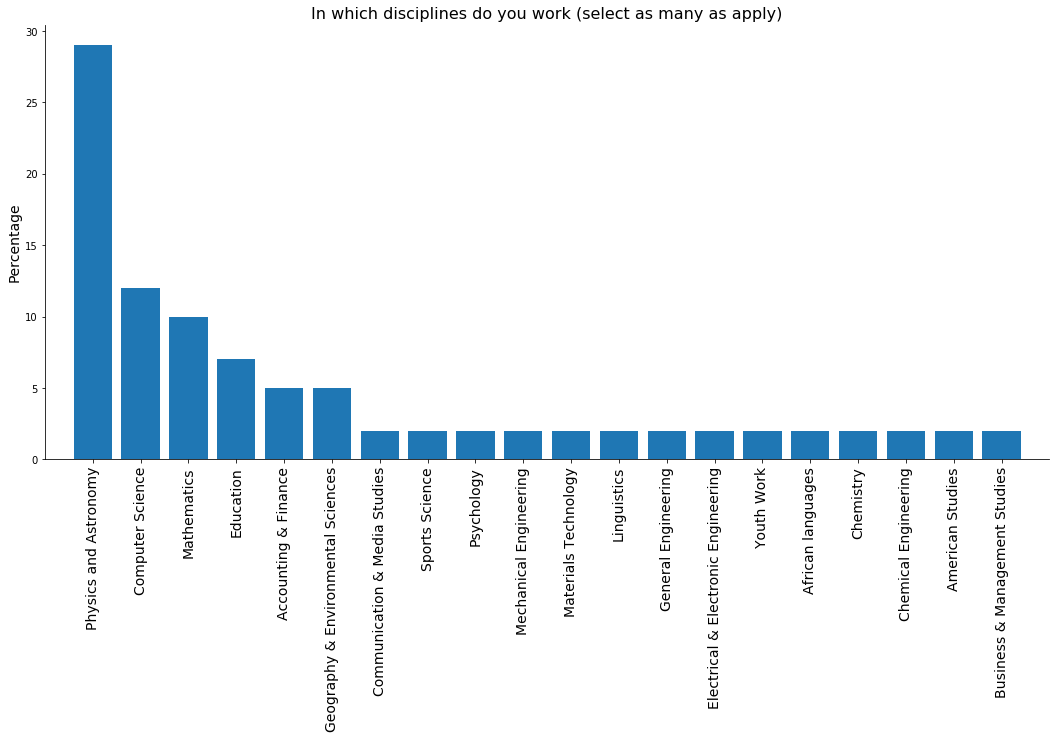

In [87]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 4: Questions about the type of contract

Almost all the participants are employed under full time contract (82%, n=18) and they are mainly Permanent (either funded by University core funding, or as long as funding is available. But this apparent stability in contract has to be tempered with the average length of the contract (5 years). On the origin of their funding (which 72%, n=13 of the participants know the origin), it seems that the type of funding is not applicable for them (40%, n=4) or that it comes from Grants (30%, n=3).  This is the method of Grants that is also privilegied as funding process for their current larger project (50%, n=5) and for their previous largest project too (50%, n=5).


### Do you work full time or part time

In [88]:
v_to_count, filename  = get_count(df, ['currentEmp12. Do you work full time or part time'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/type_hours.csv", "False", "./zaf/output/")

In [89]:
perc_to_count = get_percentage(v_to_count, filename)

In [90]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Do you work full time or part time,,
Full Time,18,82
Part-time,4,18


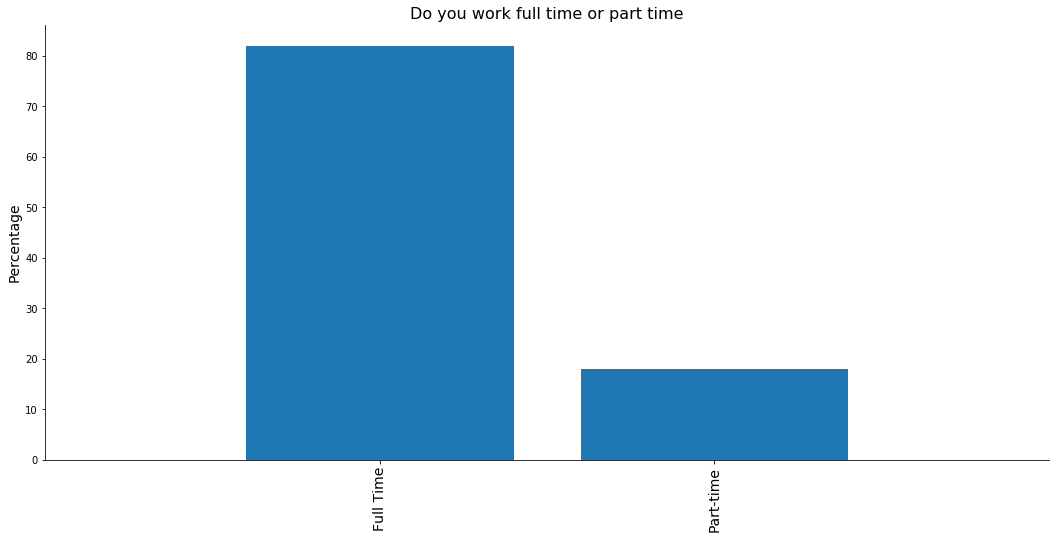

In [91]:
_ = get_plot(perc_to_count, "one choice")

### What type of contract are you employed on?

In [92]:
v_to_count, filename  = get_count(df, ['currentEmp10. What type of contract are you employed on?'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/type_contract.csv", "False", "./zaf/output/")

In [93]:
perc_to_count = get_percentage(v_to_count, filename)

In [94]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What type of contract are you employed on?,,
Other,7,32
Permanent -- funded by University core funding,6,27
Permanent -- as long as funding is available,4,18
Fixed term,3,14
Freelance consultant/contractor,2,9


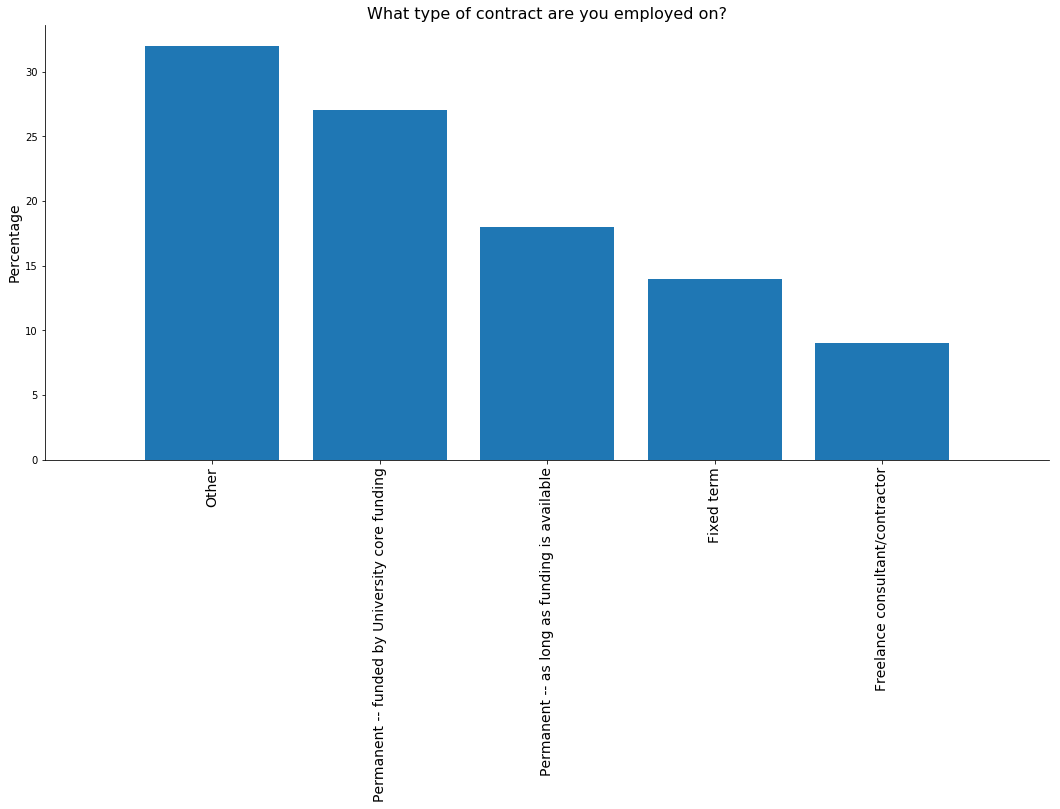

In [95]:
_ = get_plot(perc_to_count, "one choice")

### What is the total duration of your current employment (in years)?

In [96]:
v_to_count, filename  = get_count(df, ['currentEmp11. What is the total duration of your current employment (in years)?'], "freenumeric", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

### Do you know the source of the funding used to support you and your current, largest project?

In [97]:
v_to_count, filename  = get_count(df, ['fund1. Do you know the source of the funding used to support you and your current, largest project?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [98]:
perc_to_count = get_percentage(v_to_count, filename)

In [99]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
"Do you know the source of the funding used to support you and your current, largest project?",,,,,
"Do you know the source of the funding used to support you and your current, largest project?",13,5,4,72,28


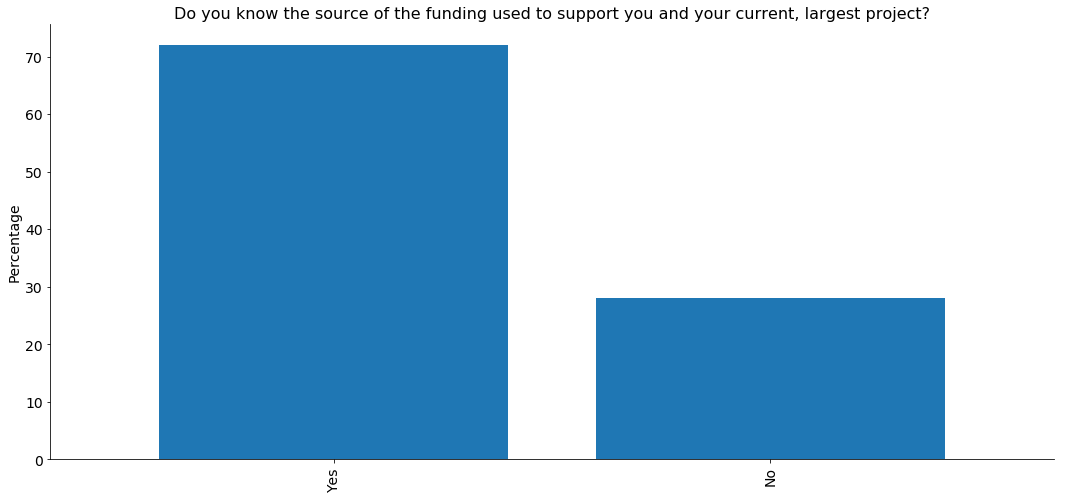

In [100]:
_ = get_plot(perc_to_count, "y/n/na")

### Which of the following sources are used to pay for your effort as an RSE/equivalent?

In [101]:
v_to_count, filename  = get_count(df, ['fund2[1]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [I volunteer my time]', 'fund2[2]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Donation button]', 'fund2[3]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (one-time)]', 'fund2[4]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (recurring)]', 'fund2[5]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Books & merchandise]', 'fund2[6]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Advertising & sponsorships]', 'fund2[7]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Industry support]', 'fund2[8]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Consulting & services]', 'fund2[9]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Grants]', 'fund2[10]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [SaaS]', 'fund2[11]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Membership]', 'fund2[12]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Dual license]', 'fund2[13]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Open core]', 'fund2[14]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Foundations & consortiums]', 'fund2[15]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Venture capital]', 'fund2[16]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Trademark licensing & franchising]', 'fund2[17]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Not applicable]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/funding.csv", "False", "./zaf/output/")

In [102]:
perc_to_count = get_percentage(v_to_count, filename)

In [103]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Which of the following sources are used to pay for your effort as an RSE/equivalent?,,
Not applicable,4,40
Grants,3,30
Books & merchandise,1,10
Industry support,1,10
Consulting & services,1,10
Crowdfunding (one-time),0,0
Crowdfunding (recurring),0,0
Advertising & sponsorships,0,0
Donation button,0,0


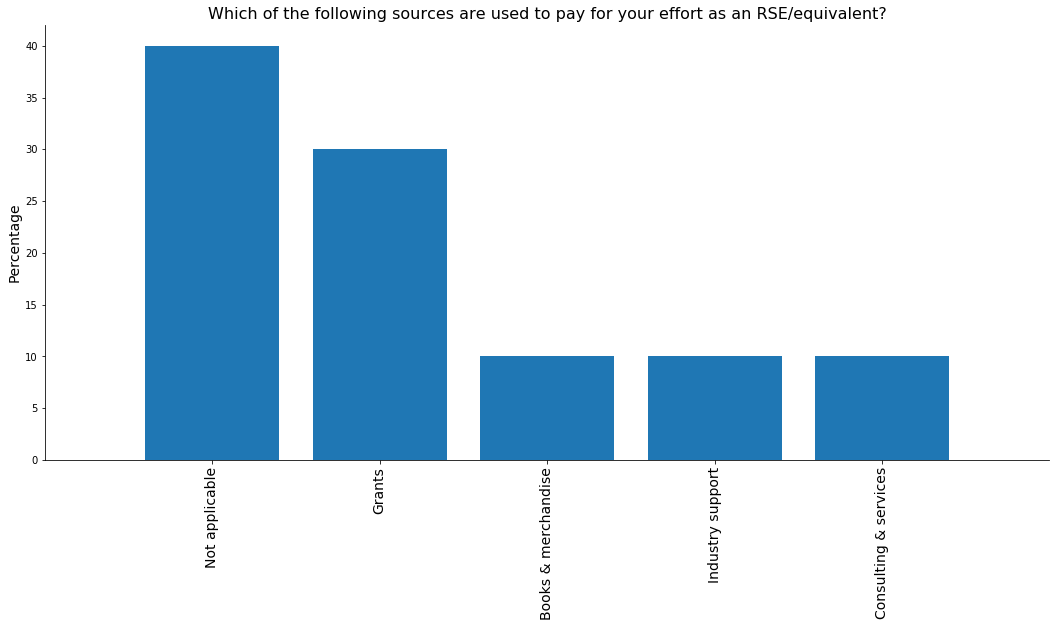

In [104]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources are used to fund your current, largest project?

In [105]:
v_to_count, filename  = get_count(df, ['fund3[1]. Which of the following sources are used to fund your current, largest project? [I volunteer my time]', 'fund3[2]. Which of the following sources are used to fund your current, largest project? [Donation button]', 'fund3[3]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (one-time)]', 'fund3[4]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (recurring)]', 'fund3[5]. Which of the following sources are used to fund your current, largest project? [Books & merchandise]', 'fund3[6]. Which of the following sources are used to fund your current, largest project? [Advertising & sponsorships]', 'fund3[7]. Which of the following sources are used to fund your current, largest project? [Industry support]', 'fund3[8]. Which of the following sources are used to fund your current, largest project? [Consulting & services]', 'fund3[9]. Which of the following sources are used to fund your current, largest project? [Grants]', 'fund3[10]. Which of the following sources are used to fund your current, largest project? [SaaS]', 'fund3[11]. Which of the following sources are used to fund your current, largest project? [Membership]', 'fund3[12]. Which of the following sources are used to fund your current, largest project? [Dual license]', 'fund3[13]. Which of the following sources are used to fund your current, largest project? [Open core]', 'fund3[14]. Which of the following sources are used to fund your current, largest project? [Foundations & consortiums]', 'fund3[15]. Which of the following sources are used to fund your current, largest project? [Venture capital]', 'fund3[16]. Which of the following sources are used to fund your current, largest project? [Trademark licensing & franchising]', 'fund3[17]. Which of the following sources are used to fund your current, largest project? [Not applicable]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/funding.csv", "False", "./zaf/output/")

In [106]:
perc_to_count = get_percentage(v_to_count, filename)

In [107]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
"Which of the following sources are used to fund your current, largest project?",,
Grants,5,50
Not applicable,2,20
Crowdfunding (recurring),1,10
Industry support,1,10
Consulting & services,1,10
Crowdfunding (one-time),0,0
Books & merchandise,0,0
Advertising & sponsorships,0,0
Donation button,0,0


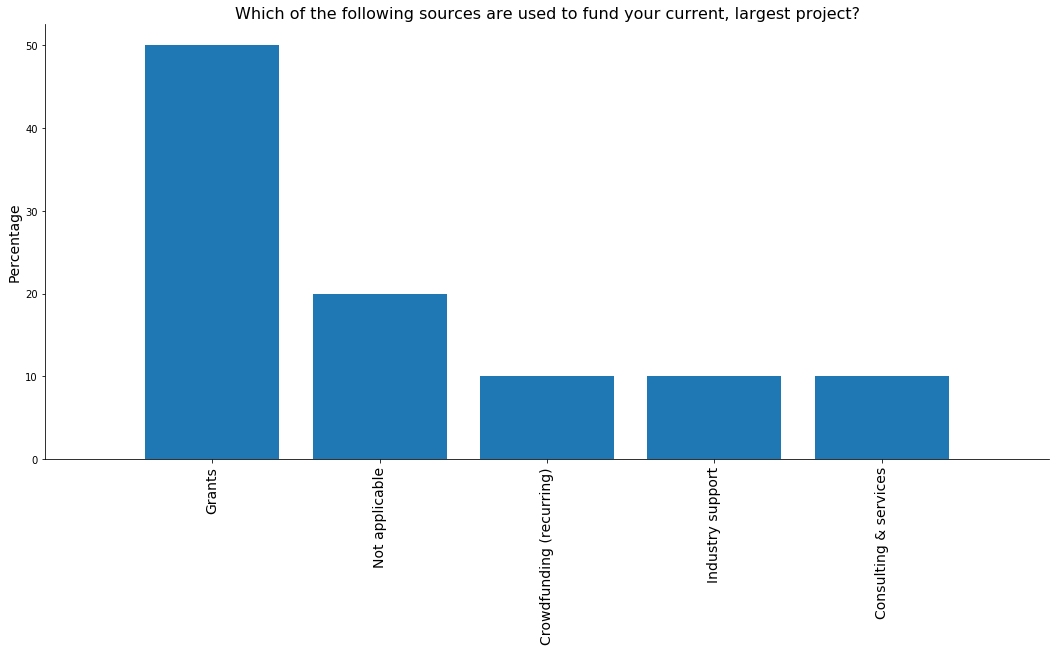

In [108]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources were used to fund your current, largest project three years ago?

In [109]:
v_to_count, filename  = get_count(df, ['fund4[1]. Which of the following sources were used to fund your current, largest project three years ago? [I volunteer my time]', 'fund4[2]. Which of the following sources were used to fund your current, largest project three years ago? [Donation button]', 'fund4[3]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (one-time)]', 'fund4[4]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (recurring)]', 'fund4[5]. Which of the following sources were used to fund your current, largest project three years ago? [Books & merchandise]', 'fund4[6]. Which of the following sources were used to fund your current, largest project three years ago? [Advertising & sponsorships]', 'fund4[7]. Which of the following sources were used to fund your current, largest project three years ago? [Industry support]', 'fund4[8]. Which of the following sources were used to fund your current, largest project three years ago? [Consulting & services]', 'fund4[9]. Which of the following sources were used to fund your current, largest project three years ago? [Grants]', 'fund4[10]. Which of the following sources were used to fund your current, largest project three years ago? [SaaS]', 'fund4[11]. Which of the following sources were used to fund your current, largest project three years ago? [Membership]', 'fund4[12]. Which of the following sources were used to fund your current, largest project three years ago? [Dual license]', 'fund4[13]. Which of the following sources were used to fund your current, largest project three years ago? [Open core]', 'fund4[14]. Which of the following sources were used to fund your current, largest project three years ago? [Foundations & consortiums]', 'fund4[15]. Which of the following sources were used to fund your current, largest project three years ago? [Venture capital]', 'fund4[16]. Which of the following sources were used to fund your current, largest project three years ago? [Trademark licensing & franchising]', 'fund4[17]. Which of the following sources were used to fund your current, largest project three years ago? [Not applicable]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/funding.csv", "False", "./zaf/output/")

In [110]:
perc_to_count = get_percentage(v_to_count, filename)

In [111]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
"Which of the following sources were used to fund your current, largest project three years ago?",,
Grants,5,50
Not applicable,4,40
Industry support,1,10
Crowdfunding (one-time),0,0
Crowdfunding (recurring),0,0
Books & merchandise,0,0
Advertising & sponsorships,0,0
Consulting & services,0,0
Donation button,0,0


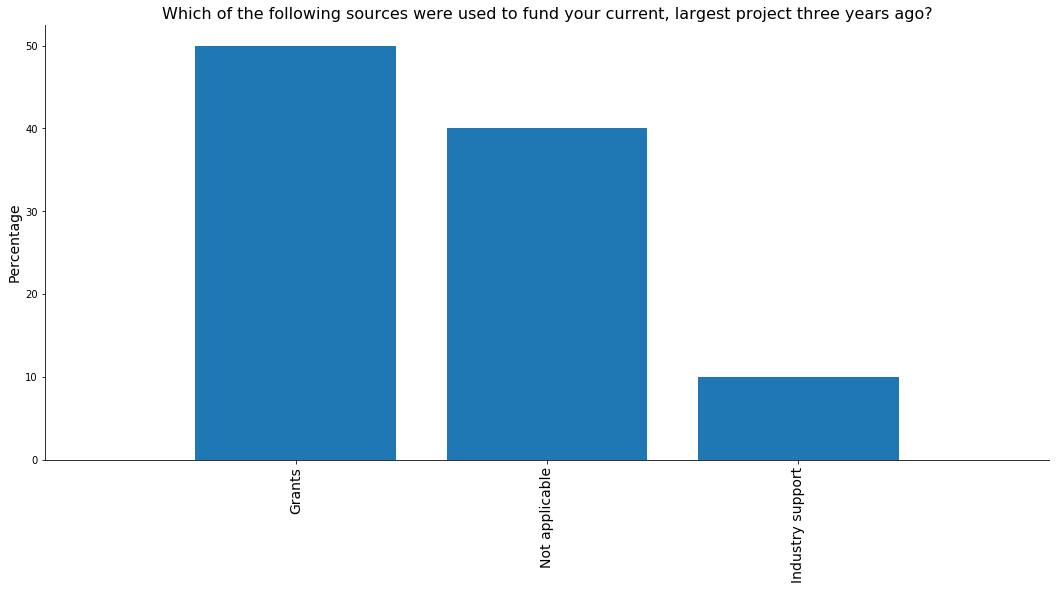

In [112]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 5: Questions about previous employment
Several questions were about the participants previous job. The idea is to collect insight of their career and understand what are their motivation to be an RSE.

More than a half of the participants worked in a university prior to their current position (59%, n=13), added to this majority, 9%, n=2 come from Research organisation.
At least 14%, n=3 shift career and moved from the private sector to academy and for 18%, n=4 it is their first job.

We asked the participants to rank the reasons why they chose their actual position among 8 different ones:
* Desire to work in a research environment
* Freedom to choose own working practices
* Desire to advance research
* I want to learn new skills
* Opportunity to develop software
* Flexible working hours
* Ability to work across disciplines
* Opportunity for career advancement
* The salary

It appears that the Desire to advance research, and the Ability to work across disciplines are the biggest reasons why the RSE chose their current position.
On the contrary, the salary and the Opportunity to develop software are the least common reasons for choosing a position as RSE. The lack of interest in developing software was also visible when we asked them in which activity they would spend more of their time.


### Where was your previous job based?

In [113]:
v_to_count, filename  = get_count(df, ['prevEmp1. Where was your previous job based?'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/previous_job.csv", "False", "./zaf/output/")

In [114]:
perc_to_count = get_percentage(v_to_count, filename)

In [115]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Where was your previous job based?,,
University,13,59
This is my first job,4,18
Private Company,3,14
"Research Organisation (e.g. SKA, HartRAO, SAEON, SANSA, ...)",2,9


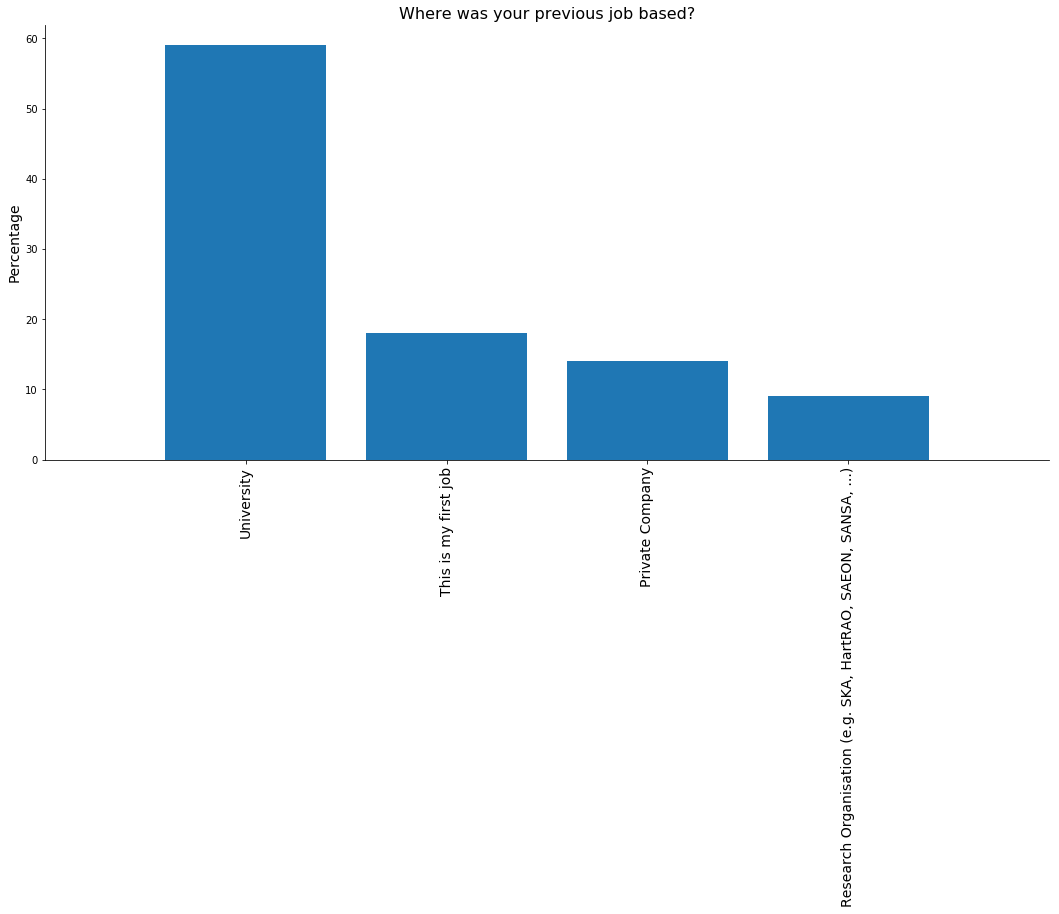

In [116]:
_ = get_plot(perc_to_count, "one choice")

### Rank the following factors dependent on how strongly they influenced your decision to accept your current position

In [117]:
v_to_count, filename  = get_count(df, ['prevEmp2[1]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 1]', 'prevEmp2[2]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 2]', 'prevEmp2[3]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 3]', 'prevEmp2[4]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 4]', 'prevEmp2[5]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 5]'], "ranking", "./../../survey_creation/2017/zaf/listAnswers/decision_job.csv", "False", "./zaf/output/")

In [118]:
perc_to_count = get_percentage(v_to_count, filename)

In [119]:
display_side_by_side(v_to_count,perc_to_count)

,Rank 1 [Count],Rank 2 [Count],Rank 3 [Count],Rank 4 [Count],Rank 5 [Count],Rank 1 [Percentage],Rank 2 [Percentage],Rank 3 [Percentage],Rank 4 [Percentage],Rank 5 [Percentage]
Reasons to choose this job,,,,,,,,,,
Desire to advance research,7.0,3.0,2.0,NaN,2,50,21,14,nan,14
Flexible working hours,4.0,1.0,NaN,3.0,4,33,8,nan,25,33
Ability to work across disciplines,2.0,4.0,3.0,1.0,3,15,31,23,8,23
Desire to work in a research environment,2.0,3.0,3.0,3.0,3,14,21,21,21,21
Freedom to choose own working practices,2.0,4.0,4.0,3.0,2,13,27,27,20,13
I want to learn new skills,2.0,3.0,3.0,3.0,2,15,23,23,23,15
Opportunity for career advancement,2.0,2.0,2.0,4.0,1,18,18,18,36,9
The salary,1.0,NaN,3.0,2.0,4,10,nan,30,20,40
Opportunity to develop software,NaN,2.0,2.0,3.0,1,nan,25,25,38,12


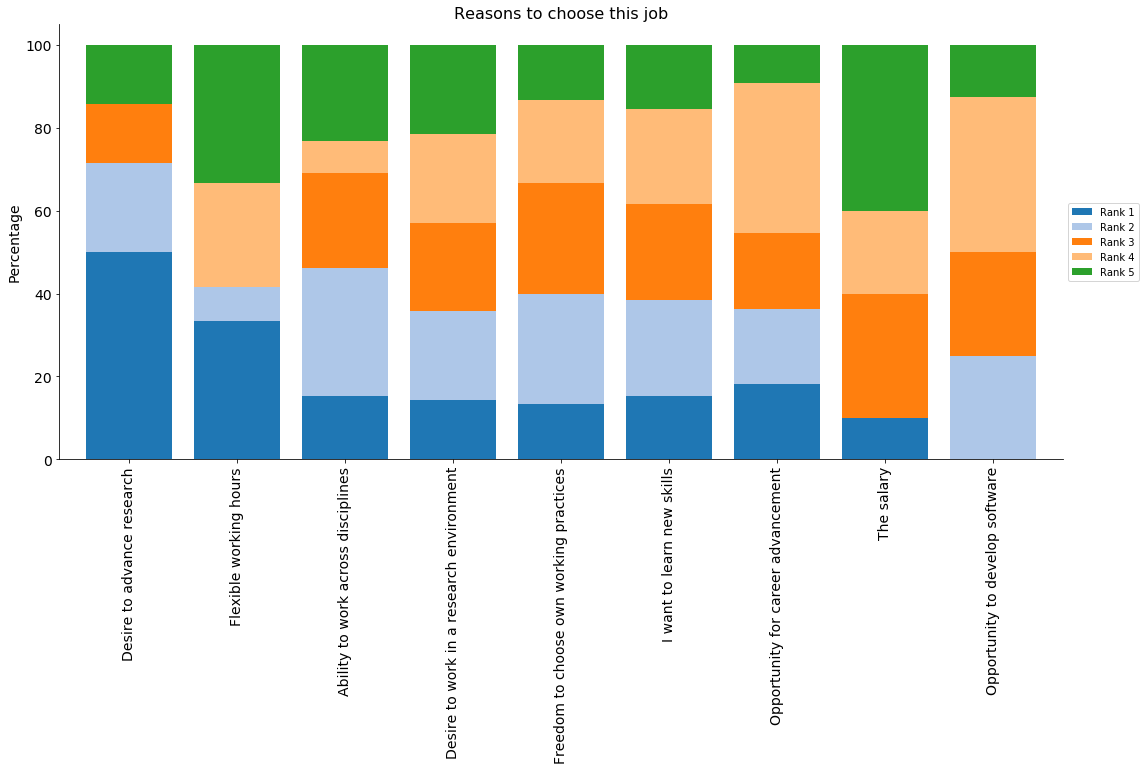

In [120]:
_ = get_plot(perc_to_count, "ranking", dropna=False)

# Section 6: Collaboration and training
RSEs do not work for themselves, their role involves writing code that is used by others (as seen in section 2), but the collaboration can take other forms. This is why we asked with whom the participants work with. Usually, they seems to be embedded in a stable group, 58% (n=11) of them report to work with the same researchers, while a minority has a more flexible collaboration (42%, n=8).
On the side of collaboration, we wanted to know if they were working within a stable group of researcher software. It appears they are not embedded in any research group for the majority of them (79%, n=15). However, they are working in team were other fellow developers are involved. In average they have 2 other fellow developers in their team, often coming from the same institution (42%, n=8).
Working for researchers or working within a research software group is different than working on the same project with other developers. On average they work on 3 different projects at the same time.

RSEs have programming skills that is not necessarily shared within their field. Therefore, they can train other researchers to develop some best practices or learn how to program more efficiently. Half of the participants provide such training (50%, n=9). They are not teaching directly to students but transferring skills is an important aspect of their job. In average, they do training twice a year. These trainings are more often done under the form of workshop or the software carpentry program than traditional teaching. A type of training probably more adapted to teach computing skills.


## Collaboration

### Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?

In [121]:
v_to_count, filename  = get_count(df, ['currentWork1. Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/work_researchers.csv", "False", "./zaf/output/")

In [122]:
perc_to_count = get_percentage(v_to_count, filename)

In [123]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
"Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?",,
Same researcher(s),11,58
Regularly change researcher(s),8,42
NaN,3,NaN


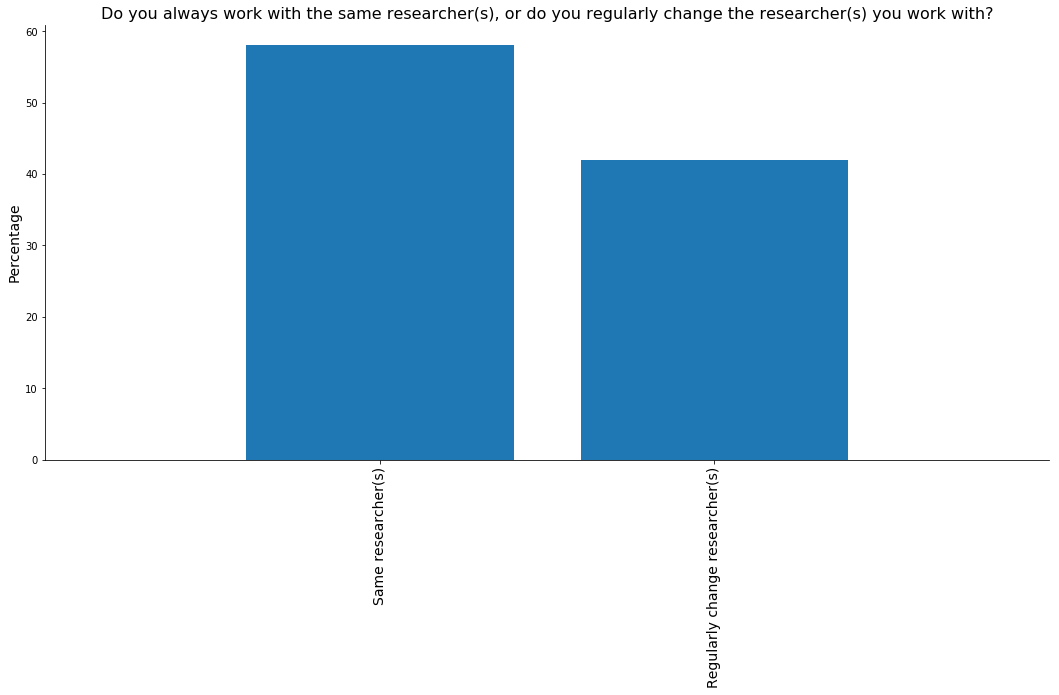

In [124]:
_ = get_plot(perc_to_count, "one choice")

### Do you work for a Research Software Group?

In [125]:
v_to_count, filename  = get_count(df, ['currentWork2. Do you work for a Research Software Group?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [126]:
perc_to_count = get_percentage(v_to_count, filename)

In [127]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Do you work for a Research Software Group?,,,,,
Do you work for a Research Software Group?,4,15,3,21,79


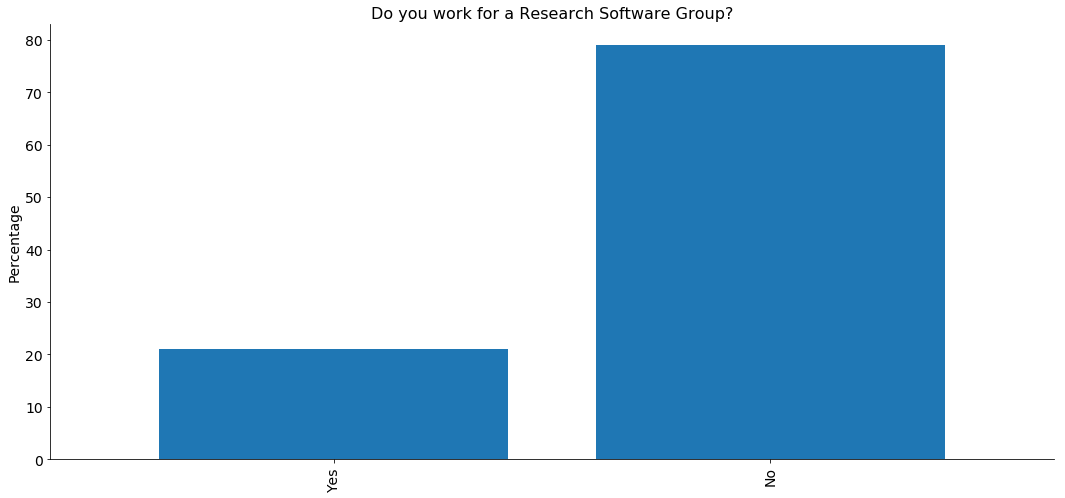

In [128]:
_ = get_plot(perc_to_count, "y/n/na")

### How many programmers are in your team - 1 means you are the only person?

In [129]:
v_to_count, filename  = get_count(df, ['proj2zaf. How many programmers are in your team - 1 means you are the only person?'], "freenumeric", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

       proj2zaf. How many programmers are in your team - 1 means you are the only person?
count                                          16.000000                                 
mean                                            2.375000                                 
std                                             2.093641                                 
min                                             0.000000                                 
25%                                             1.000000                                 
50%                                             1.500000                                 
75%                                             3.000000                                 
max                                             8.000000                                 


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


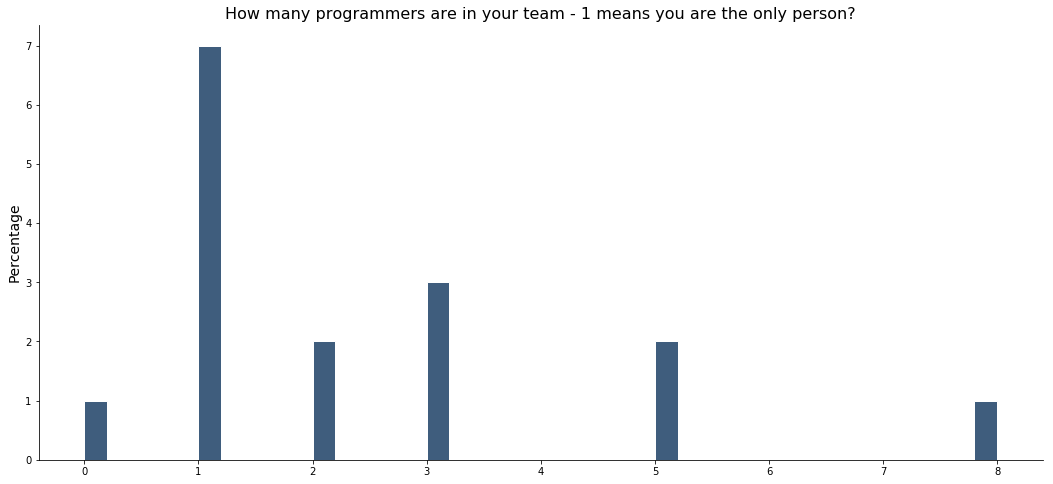

In [130]:
_ = get_plot(v_to_count, "freenumeric")

### If you have more than 1 fellow programmer in your team, where are they from?

In [131]:
v_to_count, filename  = get_count(df, ['proj3zaf[1]. If you have more than 1 fellow programmer in your team, where are they from? [Same institution]', 'proj3zaf[2]. If you have more than 1 fellow programmer in your team, where are they from? [Other organisation]', 'proj3zaf[3]. If you have more than 1 fellow programmer in your team, where are they from? [Not applicable]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/team.csv", "False", "./zaf/output/")

In [132]:
perc_to_count = get_percentage(v_to_count, filename)

In [133]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
"If you have more than 1 fellow programmer in your team, where are they from?",,
Same institution,8,42
Not applicable,8,42
Other organisation,3,16


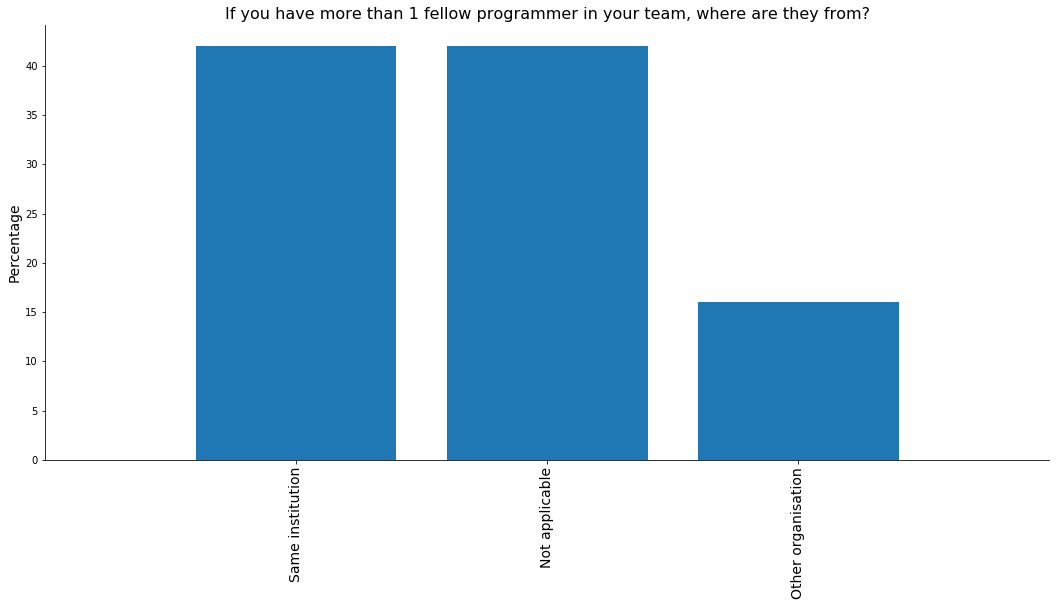

In [134]:
_ = get_plot(perc_to_count, "multiple choices")

### How many software projects are you currently involved in?

In [135]:
v_to_count, filename  = get_count(df, ['proj1can. How many software projects are you currently involved in?'], "freenumeric", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

       proj1can. How many software projects are you currently involved in?
count                                          18.000000                  
mean                                            3.111111                  
std                                             2.632129                  
min                                             0.000000                  
25%                                             1.250000                  
50%                                             2.500000                  
75%                                             4.000000                  
max                                            10.000000                  


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


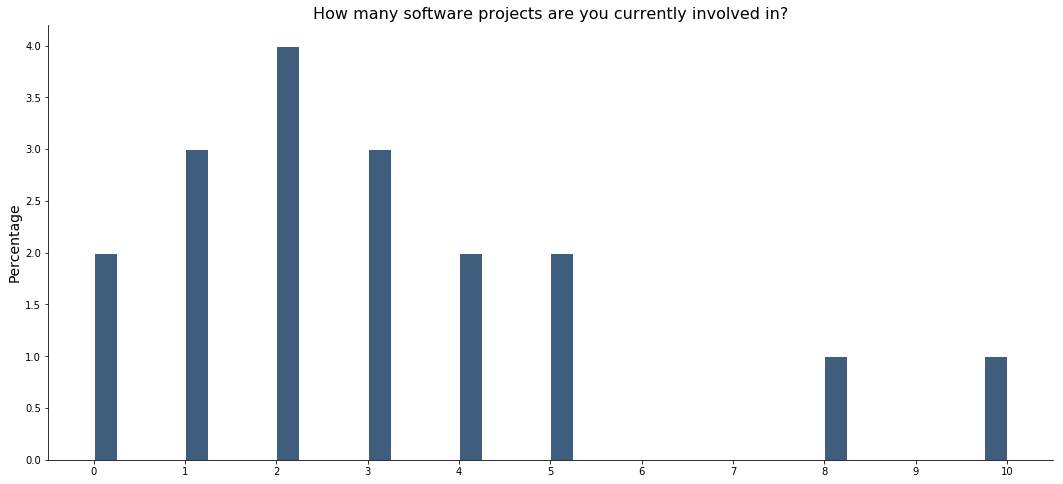

In [136]:
_ = get_plot(v_to_count, "freenumeric")

## Training

### Have you ever trained researchers in computational techniques?

In [137]:
v_to_count, filename  = get_count(df, ['train1. Have you ever trained researchers in computational techniques?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [138]:
perc_to_count = get_percentage(v_to_count, filename)

In [139]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever trained researchers in computational techniques?,,,,,
Have you ever trained researchers in computational techniques?,9,9,4,50,50


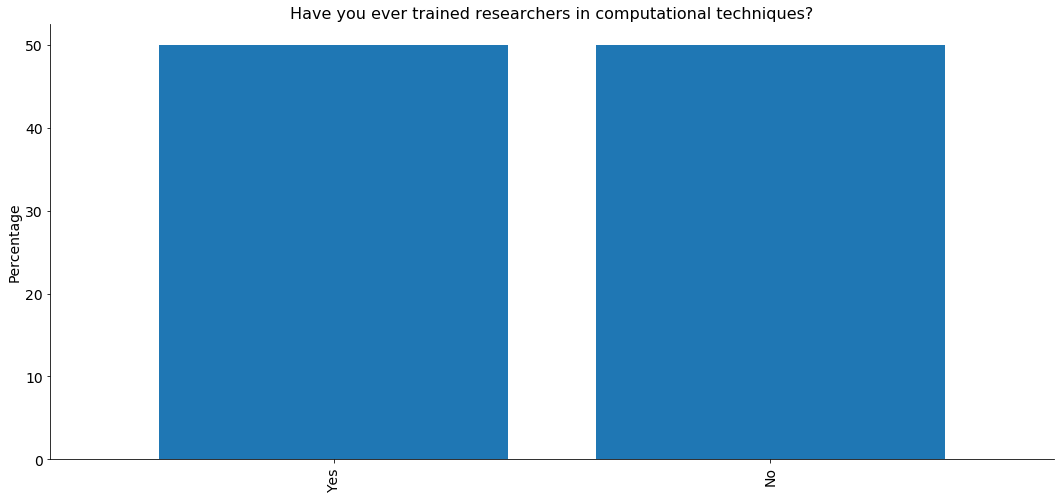

In [140]:
_ = get_plot(perc_to_count, "y/n/na")

### On average, how many times a year do you take part in providing training?

In [141]:
v_to_count, filename  = get_count(df, ['train2. On average, how many times a year do you take part in providing training?'], "freenumeric", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

       train2. On average, how many times a year do you take part in providing training?
count                                           9.000000                                
mean                                            2.147778                                
std                                             1.303474                                
min                                             0.330000                                
25%                                             2.000000                                
50%                                             2.000000                                
75%                                             2.000000                                
max                                             5.000000                                


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


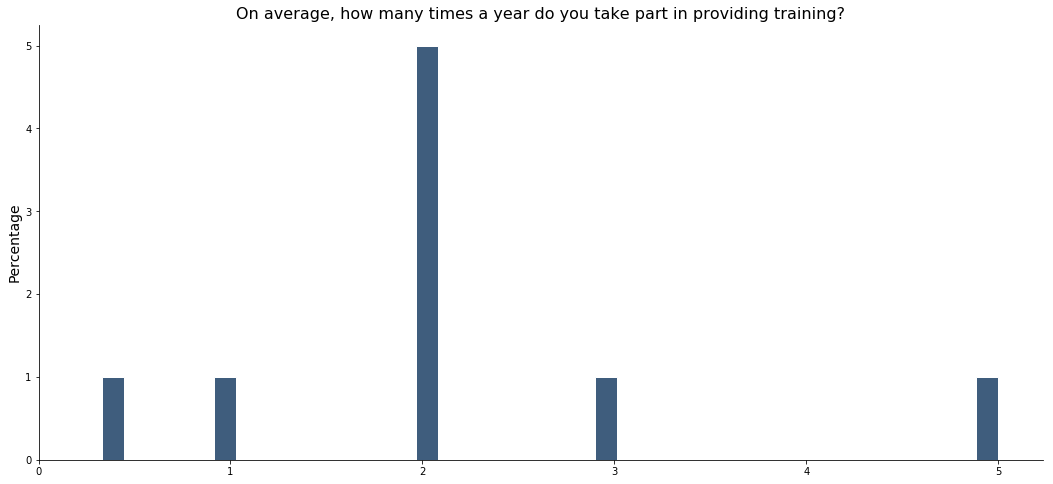

In [142]:
_ = get_plot(v_to_count, "freenumeric")

### What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)

In [143]:
 wc = wordcloud(df, ['train3. What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)'])

(-0.5, 1499.5, 799.5, -0.5)

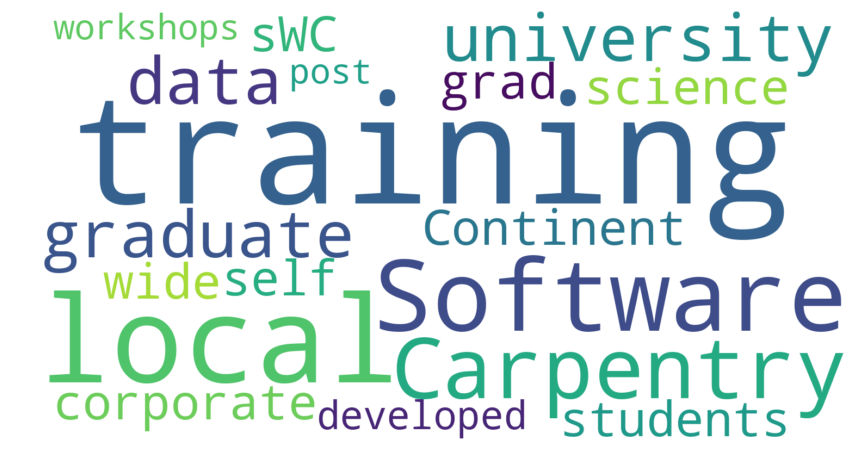

In [144]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 7: Publications
RSEs is an hybrid role between a researcher and a software developer. We investigated both of these aspects concerning publication and dissemination of their work, one on the traditional aspect of it (publications and conference) and on the more software aspect (open source and DOI).
One essential aspect of career in academia is the publications and the conferences to gain recognition. However, the role of RSE being less about writing articles than creating the infrastructure and the software for the article to exist, there is some fear that they will fail to have recognition through the papers and conferences.
Our results support this idea, while for 74% (n=14) of the participants, their software is used in published researches they are only 42% (n=8) (among them) who are acknowledged in the publication.

Among these participants that are acknowledged in the paper, only 38% (n=3) are generally named as main author for the paper. Among the 62% of those who are not main author, they are at least mentioned as co-authors (100%, n=5).
On conference, the number of RSEs that present their work in conference is rather small, only 26% (n=5), when compared to the paper publications.

One important development practice is how the code is distributed and if the RSEs are releasing their work under open licence.
We asked the participants if they have ever released their work under open source licence and 44% (n=8) of them replied by the affirmative. Among these RSEs that publish data under open source licence, the majority of them are using it more often than not (76% n=6) and prefer the licence *Apache Licence 2.0* and the *BSD 3-Clause "New" or "Revised" licence" to do so (50%, n=6).

However, they rarely use a Digital Object Identifier (DOI) to help to identify their software, only 11%, n=2 of them are doing it. And the frequency of use of the DOI among them is much more variable than for the open licence.


## Academic publications

### Has your software contributed to research that has been published in a journal or at a conference?; In general, when your software contributes to a paper, are you acknowledged in that paper?; Are you generally named as the main author of the paper?; Are you generally named as a co-author of the paper?

In [145]:
v_to_count, filename  = get_count(df, ['paper1. Has your software contributed to research that has been published in a journal or at a conference?', 'paper2. In general, when your software contributes to a paper, are you acknowledged in that paper?', 'paper3. Are you generally named as the main author of the paper?', 'paper4. Are you generally named as a co-author of the paper?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [146]:
perc_to_count = get_percentage(v_to_count, filename)

In [147]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Publications,,,,,
Has your software contributed to research that has been published in a journal or at a conference?,14.0,5.0,3.0,74,26
"In general, when your software contributes to a paper, are you acknowledged in that paper?",8.0,11.0,3.0,42,58
Are you generally named as the main author of the paper?,3.0,5.0,14.0,38,62
Are you generally named as a co-author of the paper?,5.0,NaN,17.0,100,nan


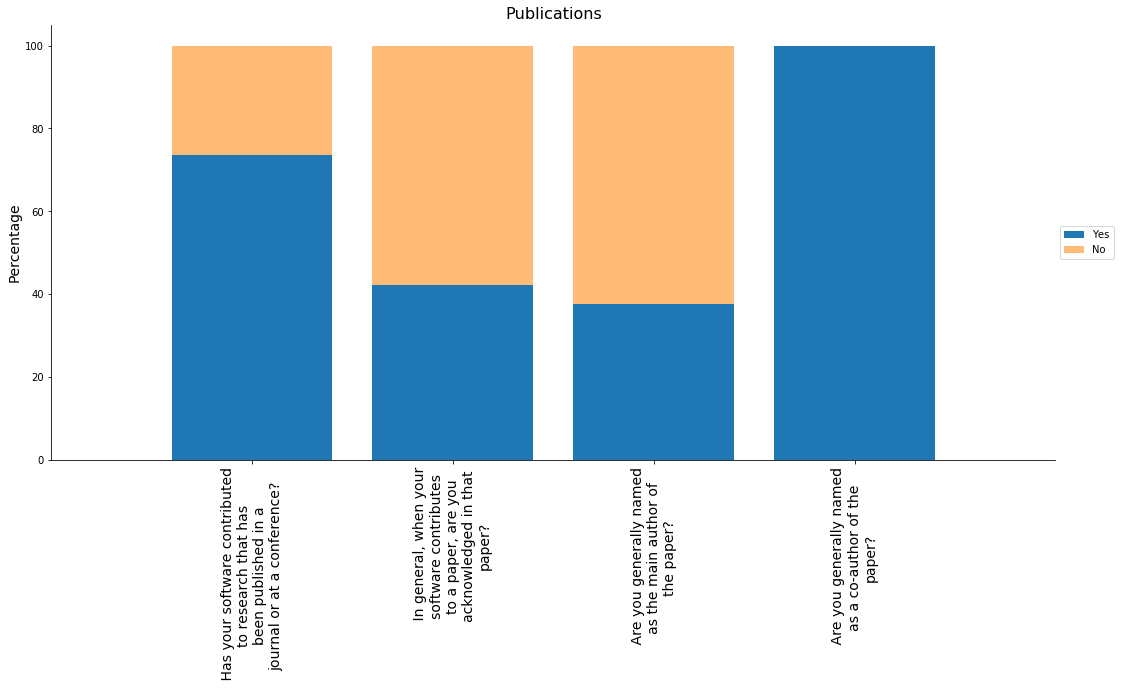

In [148]:
_ = get_plot(perc_to_count, "y/n/na")

### Have you ever presented your software work at a conference or workshop?

In [149]:
v_to_count, filename  = get_count(df, ['conf1can. Have you ever presented your software work at a conference or workshop?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [150]:
perc_to_count = get_percentage(v_to_count, filename)

In [151]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever presented your software work at a conference or workshop?,,,,,
Have you ever presented your software work at a conference or workshop?,5,14,3,26,74


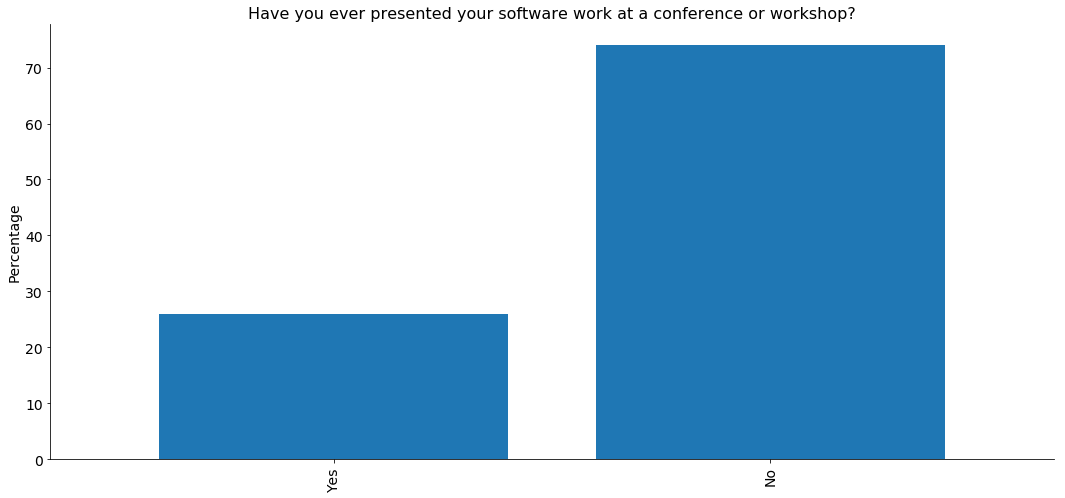

In [152]:
_ = get_plot(perc_to_count, "y/n/na")

### Which conference(s)/workshop(s) (Please write a comma separated list with FULLNAME and ACRONYM)

In [153]:
data = df['conf2can. Which conference(s)/workshop(s) (Please write a comma separated list with FULLNAME and ACRONYM)'].dropna()
data = [z.replace('/', '').replace(';', ',').replace('-', ' ').strip().lower() for z in data if z.lower().strip() not in ['lsdkfjlsdkjf']]
print('There are {} propositions'.format(len(data)))
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]

There are 4 propositions


In [154]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    #if len(k[0]) > 4:
    print(k[0].title(), k[1])

Language Resource And Evaluation Conference 1
Pattern Recognition Association Of South Africa 1
Spie 1
Science With Salt 1
Many 1


In [155]:
 wc = wordcloud(df, ['conf2can. Which conference(s)/workshop(s) (Please write a comma separated list with FULLNAME and ACRONYM)'])

(-0.5, 1499.5, 799.5, -0.5)

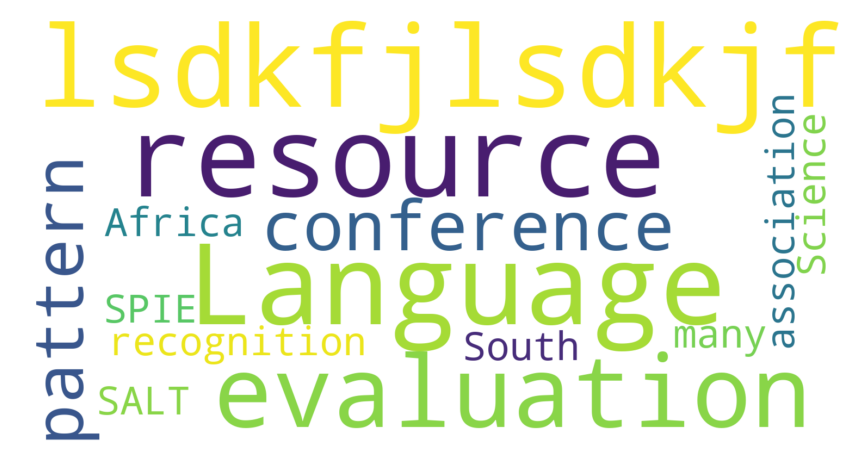

In [156]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

## Open source

### Have you ever released your software under an open-source licence?

In [157]:
v_to_count, filename  = get_count(df, ['open01can. Have you ever released your software under an open-source licence?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [158]:
perc_to_count = get_percentage(v_to_count, filename)

In [159]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever released your software under an open-source licence?,,,,,
Have you ever released your software under an open-source licence?,8,10,4,44,56


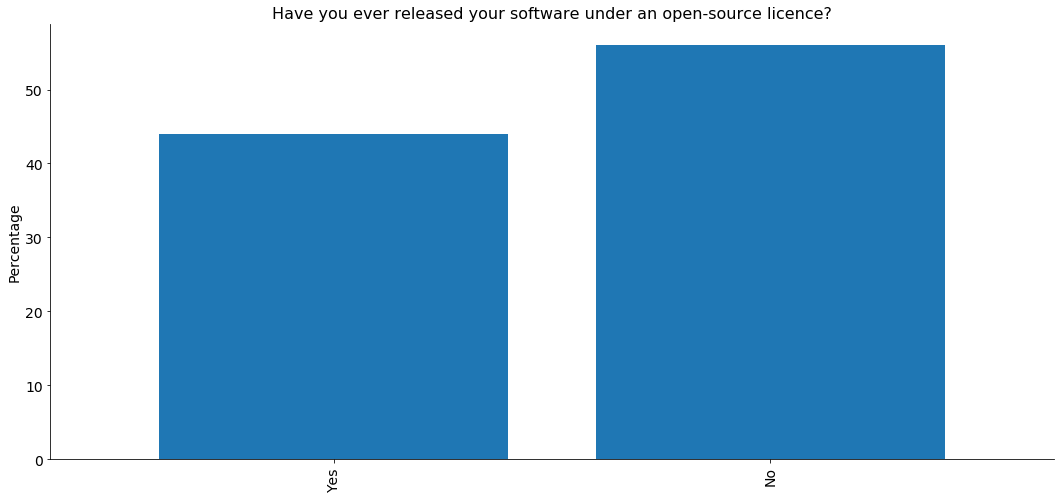

In [160]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you release the software projects you've worked on under an open-source licence?

In [161]:
v_to_count, filename  = get_count(df, ["open1can[SQ001]. How often do you release the software projects you've worked on under an open-source licence? []"], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_time_10.csv", "False", "./zaf/output/")

In [162]:
perc_to_count = get_percentage(v_to_count, filename)

In [163]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
How often do you release the software projects you've worked on under an open-source licence?,,
1 (Never),NaN,nan
2,1.0,nan
3,NaN,nan
4,1.0,nan
5,1.0,nan
6,1.0,nan
7,3.0,nan
8,NaN,nan
9,1.0,nan


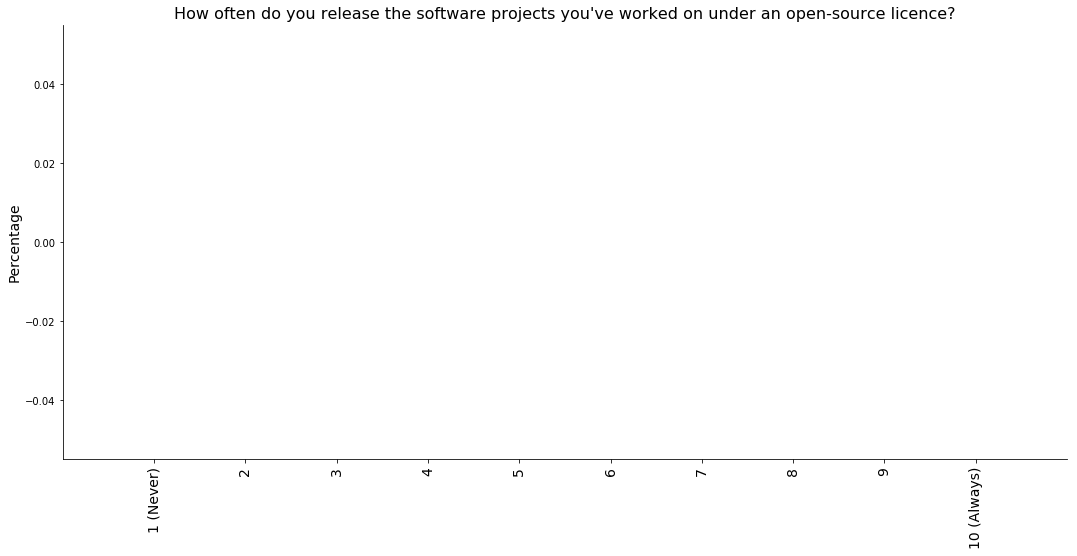

In [164]:
_ = get_plot(perc_to_count, "likert")

### Which open source licences do you prefer to use for your software?

In [165]:
v_to_count, filename  = get_count(df, ['open02zaf[1]. Which open source licences do you prefer to use for your software? [Apache License 2.0]', 'open02zaf[2]. Which open source licences do you prefer to use for your software? [BSD 3-Clause "New" or "Revised" license]', 'open02zaf[3]. Which open source licences do you prefer to use for your software? [BSD 2-Clause "Simplified" or "FreeBSD" license]', 'open02zaf[4]. Which open source licences do you prefer to use for your software? [Common Development and Distribution License]', 'open02zaf[5]. Which open source licences do you prefer to use for your software? [Eclipse Public License]', 'open02zaf[6]. Which open source licences do you prefer to use for your software? [GNU General Public License (GPL)]', 'open02zaf[7]. Which open source licences do you prefer to use for your software? [GNU Library or "Lesser" General Public License (LGPL)]', 'open02zaf[8]. Which open source licences do you prefer to use for your software? [MIT license]', 'open02zaf[9]. Which open source licences do you prefer to use for your software? [Mozilla Public License 2.0]', "open02zaf[10]. Which open source licences do you prefer to use for your software? [I don't know]"], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/open_licences.csv", "False", "./zaf/output/")

In [166]:
perc_to_count = get_percentage(v_to_count, filename)

In [167]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Which open source licences do you prefer to use for your software?,,
Apache License 2.0,3,25
"BSD 3-Clause ""New"" or ""Revised"" license",3,25
GNU General Public License (GPL),2,17
MIT license,2,17
I don't know,2,17
"BSD 2-Clause ""Simplified"" or ""FreeBSD"" license",0,0
Common Development and Distribution License,0,0
Eclipse Public License,0,0
"GNU Library or ""Lesser"" General Public License (LGPL)",0,0


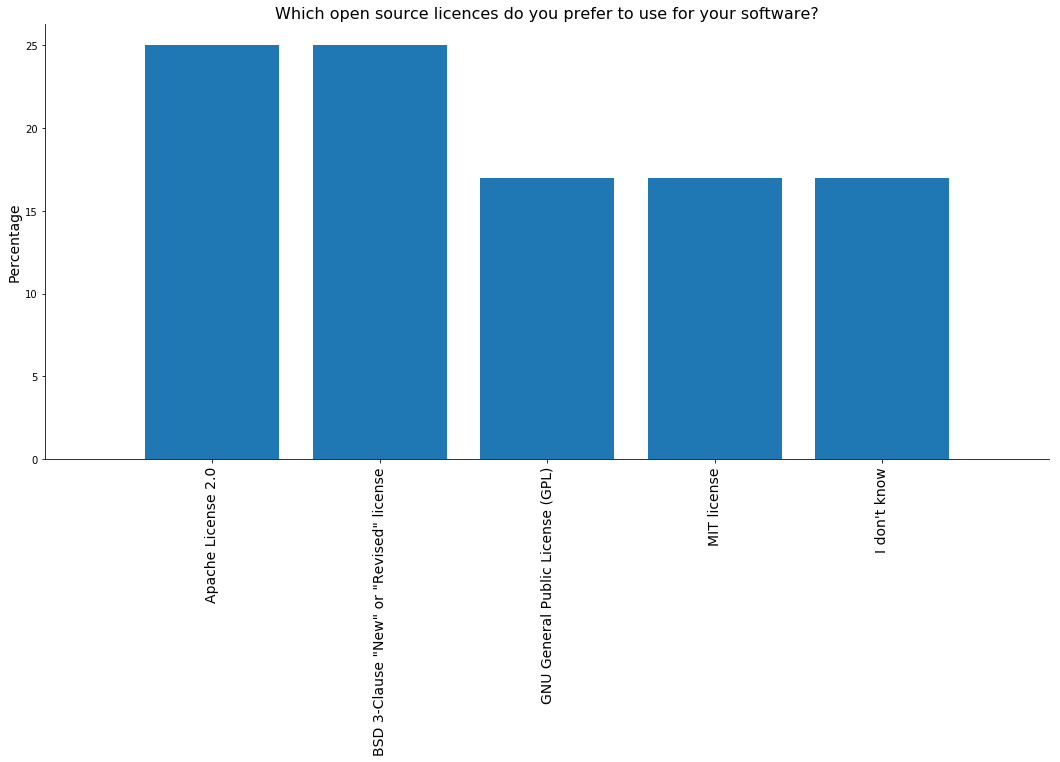

In [168]:
_ = get_plot(perc_to_count, "multiple choices")

### Have you ever used a Digital Object Identifier (DOI) to identify your software?

In [169]:
v_to_count, filename  = get_count(df, ['open03can. Have you ever used a Digital Object Identifier (DOI) to identify your software?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [170]:
perc_to_count = get_percentage(v_to_count, filename)

In [171]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever used a Digital Object Identifier (DOI) to identify your software?,,,,,
Have you ever used a Digital Object Identifier (DOI) to identify your software?,2,16,4,11,89


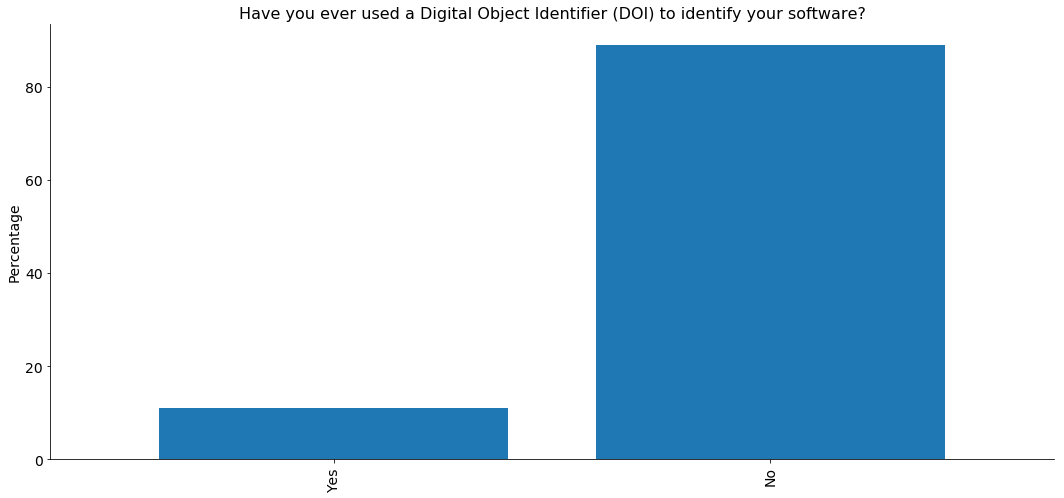

In [172]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you associate your software with a Digital Object Identifier (DOI)?

In [173]:
v_to_count, filename  = get_count(df, ['open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_time_10.csv", "False", "./zaf/output/")

In [174]:
perc_to_count = get_percentage(v_to_count, filename)

In [175]:
display(v_to_count) 

,open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []
How often do you associate your software with a Digital Object Identifier (DOI)?,
1 (Never),NaN
2,NaN
3,1.0
4,NaN
5,NaN
6,NaN
7,NaN
8,1.0
9,NaN


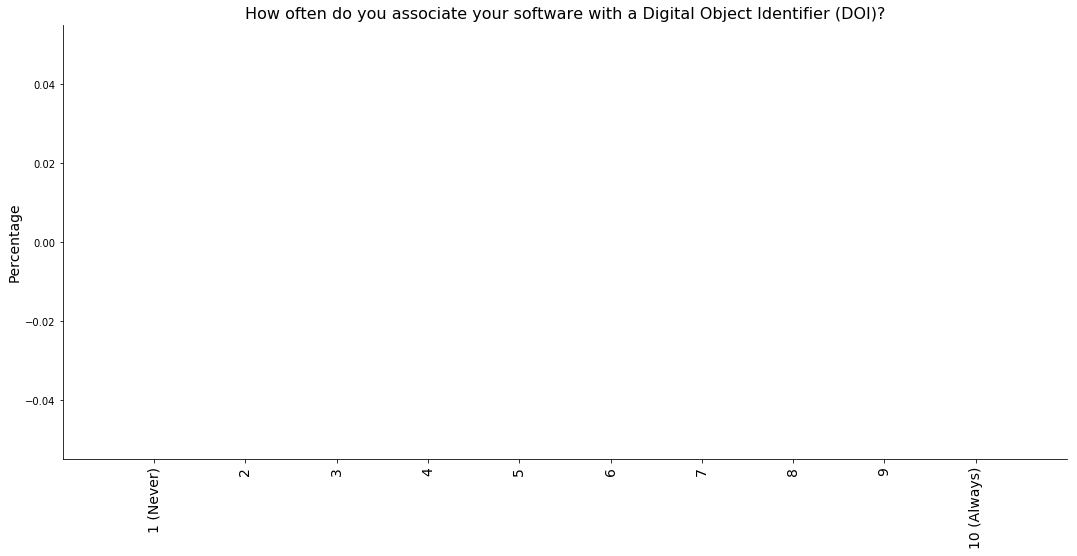

In [176]:
_ = get_plot(perc_to_count, "likert")

# Section 8: Sustainability and technical details
This section comprises two subsections that focus on the technical and development aspects of the RSEs' work. They aim to understand good practices in developing software and which tools are important for RSEs.

Developing software requires a set of good practices to ensure the quality of the subsequent analysis as well as the robustness of the developed software, to name a few of important aspects. We wanted to see if the implementation of some simple but essential good practices were a reality. Three measures were created, the implementation of testing, the bus factor and the technical hand over plan.
These metrics allows to see the importance of the RSEs role in their team but also if they are themselves implementing some practices that are used widely in industry but less in academic research.

We asked the participants to choose any of the following testing methods:
* Test engineers conduct testing
* Developers conduct testing
* Users conduct testing
* No formal testing

Obviously, the *test engineers conduct testing* is the most potential testing method but may not be possible in number of small projects while, no formal testing should not occur in any ideal scenario, regardless of the size of the project.

24% (n=7) of the participants confessed they were not implementing any testing at all. It may seems a low number but we think it is still a high percentage considering the specific work of this population. When they are conducting testing, the RSEs seems to prefer (or only able to implement) *developer testing* (41% of them, n=12) or letting the users conduct the testing (28%, n=8), while the use of test engineers is marginal (7%, n=2).

We chose two broad measures to provide an insight into sustainability: the bus factor and technical hand over planning. The bus factor is a measure of the number of developers who understand a specific software project and could, with only a cursory review of the project, maintain or extend the code. A project with a bus factor of 1 is completely reliant on only one developer. If this developer finds new employment, becomes ill or is hit by the titular bus, then the project will fail. A high bus factor provides some confidence that the project can be sustained even if a developer leaves. A technical hand over plan is used to introduce a new developer to a software project. These plans cover basic information, such as the licence and location of the software, a repository, a description of the software architecture, a summary of development plans and any other information that a new developer would need to understand the software. A project that has written (and maintained) a technical hand over plan can withstand the departure of a developer, even a key developer, significantly better than one without such a plan.

On a vast majority of the RSEs' projects the bus factor is 1 (78%, n=14), higher bus factors are only marginal. The presence of a technical plan can mitigate the low bus factor in the different projects. But this presence is really low (11%, n=2) and presents a risk of project failures.

On a more positive note about sustainability, it appears that a large majority of the participants use a version control (76%, n=16) and mainly GIT (62%, n=13).
They also extensively use collaboration tools (97%, n=17), they mostly use Github (60%, n=12) but some are using Institutional Repository (15%, n=3) or Bitbucket (10%, n=2). They also extensively use collaboration online tools to communicate with their project groups, mainly Slack.

On technical details we wanted to know which of the programming languages are mostly used by the RSEs. We give them a multi-choice list inspired by the [results](https://insights.stackoverflow.com/survey/2017#most-popular-technologies) published by Stackoverflow. Python is clearly the most used language (22%, n=9) followed by SQL (10%, n=4) and R (10%, n=4).
About which Operating System used by RSEs, a majority are using GNU/Linux (46%, n=6), while Windows and OS X have way less users (31%, n=4 and 23%, n=3).


## Good practices

### In general, what sort of testing do you conduct on your software? (check all that apply)

In [177]:
v_to_count, filename  = get_count(df, ['proj4can[1]. In general, what sort of testing do you conduct on your software? (check all that apply) [No formal testing]', 'proj4can[2]. In general, what sort of testing do you conduct on your software? (check all that apply) [Developers conduct testing]', 'proj4can[3]. In general, what sort of testing do you conduct on your software? (check all that apply) [Test engineers conduct testing]', 'proj4can[4]. In general, what sort of testing do you conduct on your software? (check all that apply) [Users conduct testing]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/testing.csv", "False", "./zaf/output/")

In [178]:
perc_to_count = get_percentage(v_to_count, filename)

In [179]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
"In general, what sort of testing do you conduct on your software? (check all that apply)",,
Developers conduct testing,12,41
Users conduct testing,8,28
No formal testing,7,24
Test engineers conduct testing,2,7


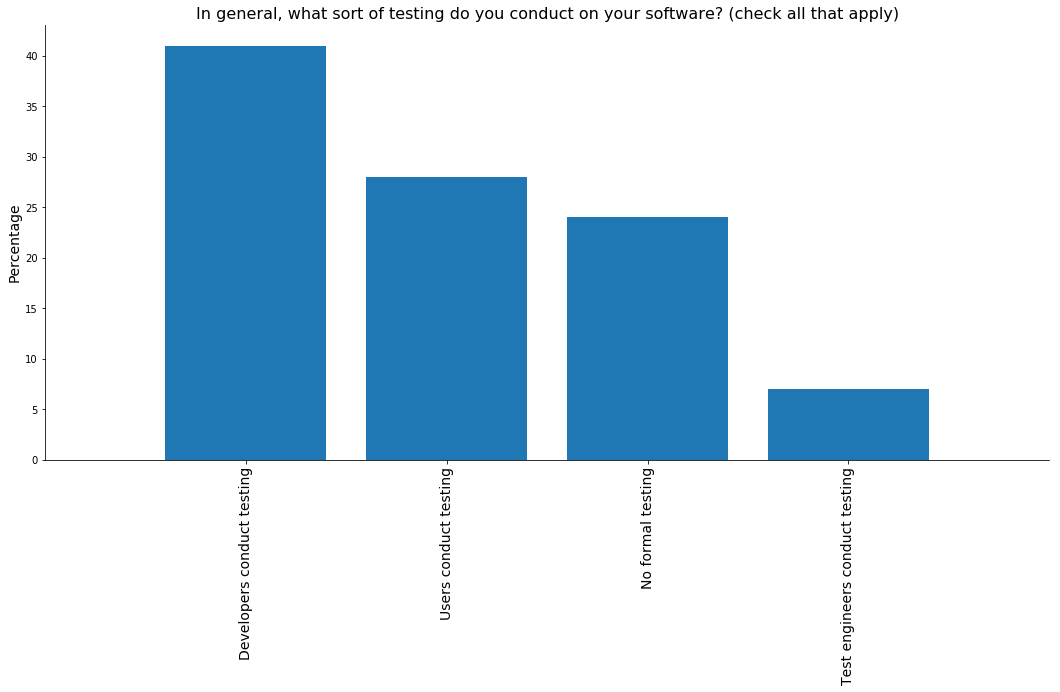

In [180]:
_ = get_plot(perc_to_count, "multiple choices")

### What is the bus factor of your most important software project? (the bus factor is the number of team members who, if run over by a bus, would put the project in jeopardy, so 1 means the project is dependent on a single person)

In [181]:
v_to_count, filename  = get_count(df, ['stability1[SQ001]. What is the bus factor of your most important software project? (the bus factor is the number of team members who, if run over by a bus, would put the project in jeopardy, so 1 means the project is dependent on a single person) []'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/bus_factor.csv", "True", "./zaf/output/")

In [182]:
perc_to_count = get_percentage(v_to_count, filename)

In [183]:
display_side_by_side(v_to_count, perc_to_count)

,Count,Percentage
"What is the bus factor of your most important software project? (the bus factor is the number of team members who, if run over by a bus, would put the project in jeopardy, so 1 means the project is dependent on a single person)",,
1,14,78
2,2,11
3,1,6
5+,1,6
NaN,4,NaN


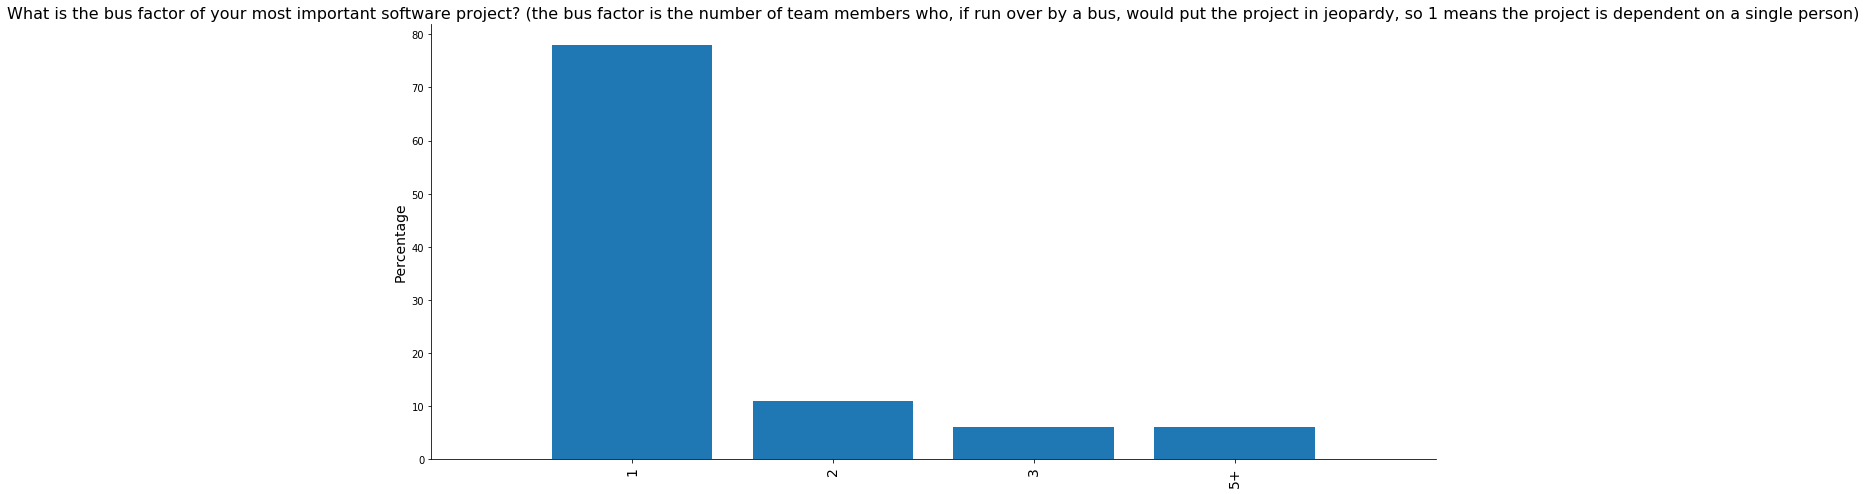

In [184]:
_ = get_plot(perc_to_count, "one choice")

### Is there a technical hand-over plan for your most important software project?

In [185]:
v_to_count, filename  = get_count(df, ['stability2. Is there a technical hand-over plan for your most important software project?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [186]:
perc_to_count = get_percentage(v_to_count, filename)

In [187]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Is there a technical hand-over plan for your most important software project?,,,,,
Is there a technical hand-over plan for your most important software project?,2,16,4,11,89


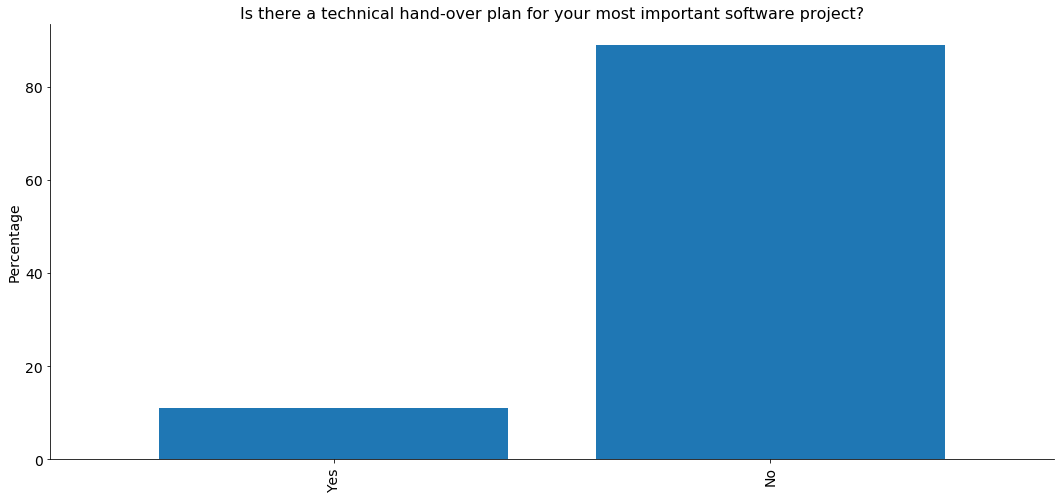

In [188]:
_ = get_plot(perc_to_count, "y/n/na")

### Which, if any, version control tools do you use for software development?

In [189]:
v_to_count, filename  = get_count(df, ['proj5zaf[1]. Which, if any, version control tools do you use for software development? [CVS]', 'proj5zaf[2]. Which, if any, version control tools do you use for software development? [SVN]', 'proj5zaf[3]. Which, if any, version control tools do you use for software development? [GIT]', 'proj5zaf[4]. Which, if any, version control tools do you use for software development? [Mercurial]', 'proj5zaf[5]. Which, if any, version control tools do you use for software development? [None]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/version_tools.csv", "False", "./zaf/output/")

In [190]:
perc_to_count = get_percentage(v_to_count, filename)

In [191]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
"Which, if any, version control tools do you use for software development?",,
GIT,13,62
None,5,24
SVN,2,10
CVS,1,5
Mercurial,0,0


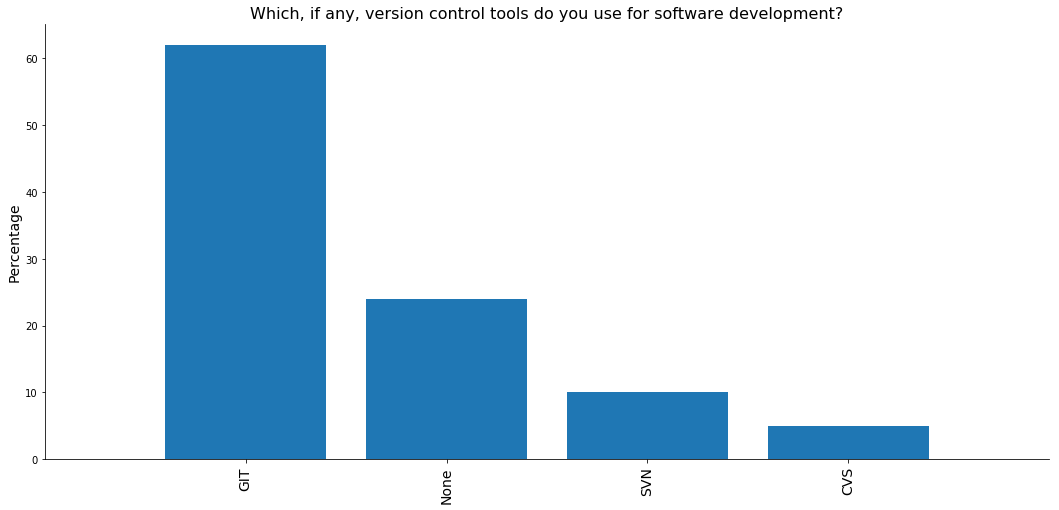

In [192]:
_ = get_plot(perc_to_count, "multiple choices")

### Which, if any, online collaboration tools and open repositories do you use for software development?

In [193]:
v_to_count, filename  = get_count(df, ['proj6zaf[1]. Which, if any, online collaboration tools and open repositories do you use for software development? [Github]', 'proj6zaf[2]. Which, if any, online collaboration tools and open repositories do you use for software development? [Bitbucket]', 'proj6zaf[3]. Which, if any, online collaboration tools and open repositories do you use for software development? [Zenodo]', 'proj6zaf[4]. Which, if any, online collaboration tools and open repositories do you use for software development? [Figshare]', 'proj6zaf[5]. Which, if any, online collaboration tools and open repositories do you use for software development? [Institutional Repository]', 'proj6zaf[6]. Which, if any, online collaboration tools and open repositories do you use for software development? [None]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/open_tools.csv", "False", "./zaf/output/")

In [194]:
perc_to_count = get_percentage(v_to_count, filename)

In [195]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
"Which, if any, online collaboration tools and open repositories do you use for software development?",,
Github,12,60
Institutional Repository,3,15
None,3,15
Bitbucket,2,10
Zenodo,0,0
Figshare,0,0


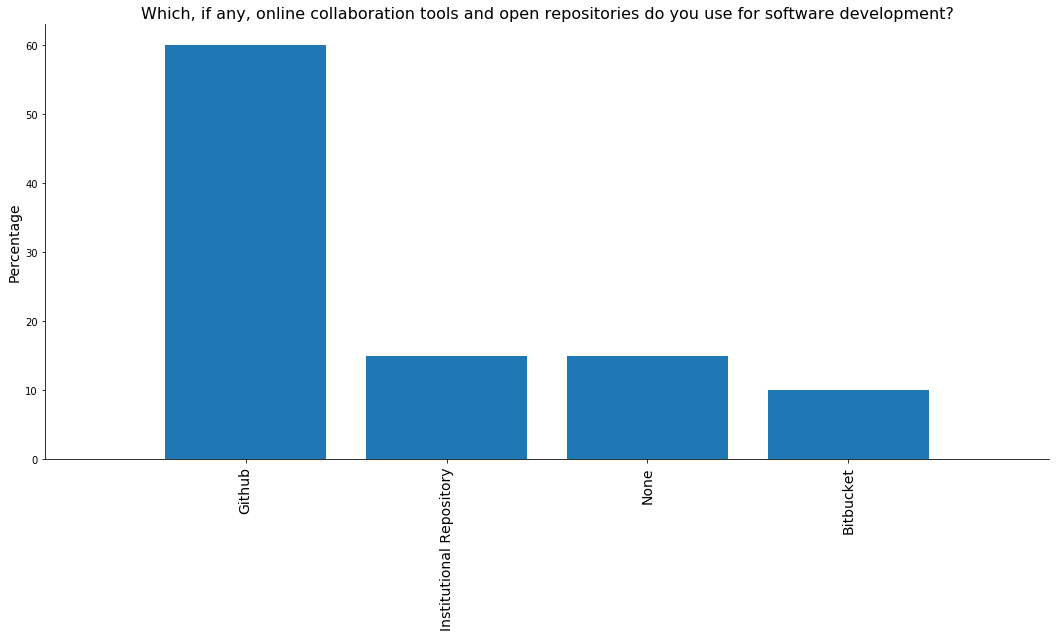

In [196]:
_ = get_plot(perc_to_count, "multiple choices")

## Technical details

### What programming languages do you use at work? (Select as many as apply)

In [197]:
v_to_count, filename  = get_count(df, ['tool4can[1]. What programming languages do you use at work? (Select as many as apply) [Swift]', 'tool4can[2]. What programming languages do you use at work? (Select as many as apply) [JavaScript]', 'tool4can[3]. What programming languages do you use at work? (Select as many as apply) [R]', 'tool4can[4]. What programming languages do you use at work? (Select as many as apply) [PHP]', 'tool4can[5]. What programming languages do you use at work? (Select as many as apply) [C]', 'tool4can[6]. What programming languages do you use at work? (Select as many as apply) [Common Lisp]', 'tool4can[7]. What programming languages do you use at work? (Select as many as apply) [Erlang]', 'tool4can[8]. What programming languages do you use at work? (Select as many as apply) [Smalltalk]', 'tool4can[9]. What programming languages do you use at work? (Select as many as apply) [CoffeeScript]', 'tool4can[10]. What programming languages do you use at work? (Select as many as apply) [F#]', 'tool4can[11]. What programming languages do you use at work? (Select as many as apply) [Java]', 'tool4can[12]. What programming languages do you use at work? (Select as many as apply) [Rust]', 'tool4can[13]. What programming languages do you use at work? (Select as many as apply) [SQL]', 'tool4can[14]. What programming languages do you use at work? (Select as many as apply) [TypeScript]', 'tool4can[15]. What programming languages do you use at work? (Select as many as apply) [Hack]', 'tool4can[16]. What programming languages do you use at work? (Select as many as apply) [C++]', 'tool4can[17]. What programming languages do you use at work? (Select as many as apply) [Visual Basic]', 'tool4can[18]. What programming languages do you use at work? (Select as many as apply) [C#]', 'tool4can[19]. What programming languages do you use at work? (Select as many as apply) [Matlab]', 'tool4can[20]. What programming languages do you use at work? (Select as many as apply) [Perl]', 'tool4can[21]. What programming languages do you use at work? (Select as many as apply) [Fortran]', 'tool4can[22]. What programming languages do you use at work? (Select as many as apply) [Groovy]', 'tool4can[23]. What programming languages do you use at work? (Select as many as apply) [Haskell]', 'tool4can[24]. What programming languages do you use at work? (Select as many as apply) [Julia]', 'tool4can[25]. What programming languages do you use at work? (Select as many as apply) [Lua]', 'tool4can[26]. What programming languages do you use at work? (Select as many as apply) [Scala]', 'tool4can[27]. What programming languages do you use at work? (Select as many as apply) [Objective-C]', 'tool4can[28]. What programming languages do you use at work? (Select as many as apply) [Python]', 'tool4can[29]. What programming languages do you use at work? (Select as many as apply) [Go]', 'tool4can[30]. What programming languages do you use at work? (Select as many as apply) [Assembly]', 'tool4can[31]. What programming languages do you use at work? (Select as many as apply) [VBA]', 'tool4can[32]. What programming languages do you use at work? (Select as many as apply) [Elixir]', 'tool4can[33]. What programming languages do you use at work? (Select as many as apply) [VB.NET]', 'tool4can[34]. What programming languages do you use at work? (Select as many as apply) [Ruby]', 'tool4can[35]. What programming languages do you use at work? (Select as many as apply) [Clojure]', 'tool4can[36]. What programming languages do you use at work? (Select as many as apply) [Dart]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/programing_language.csv", "False", "./zaf/output/")

In [198]:
perc_to_count = get_percentage(v_to_count, filename)

In [199]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What programming languages do you use at work? (Select as many as apply),,
Python,9,22
SQL,4,10
R,4,10
C,4,10
C++,4,10
Fortran,3,7
JavaScript,3,7
C#,2,5
Matlab,1,2


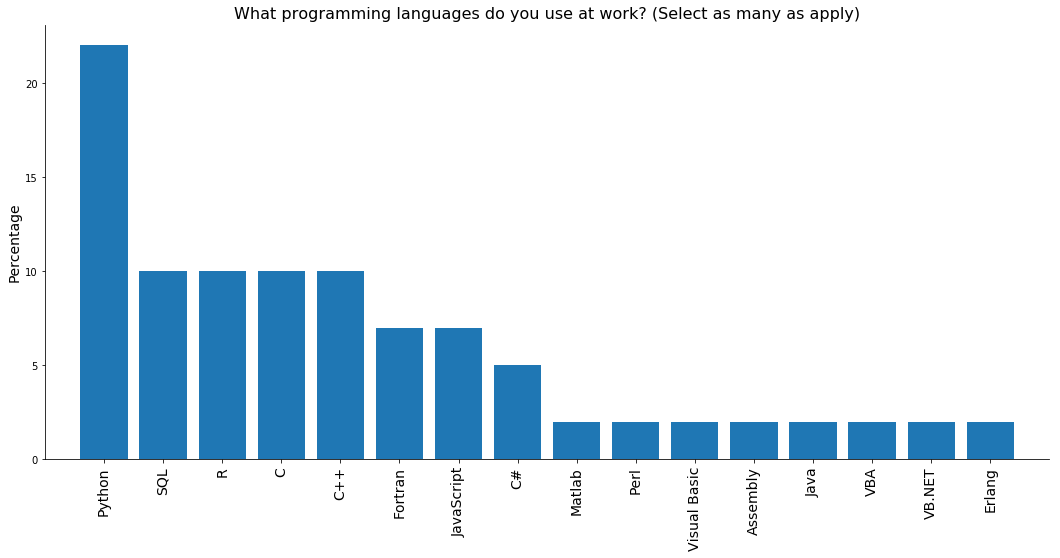

In [200]:
_ = get_plot(perc_to_count, "multiple choices")

### What Operating System do you prefer to use at work?

In [201]:
v_to_count, filename  = get_count(df, ['tool2. What Operating System do you prefer to use at work?'], "one choice", "./../../survey_creation/2017/zaf/listAnswers/os.csv", "False", "./zaf/output/")

In [202]:
perc_to_count = get_percentage(v_to_count, filename)

In [203]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What Operating System do you prefer to use at work?,,
GNU/Linux,6,46
Windows,4,31
OS X,3,23
NaN,9,NaN


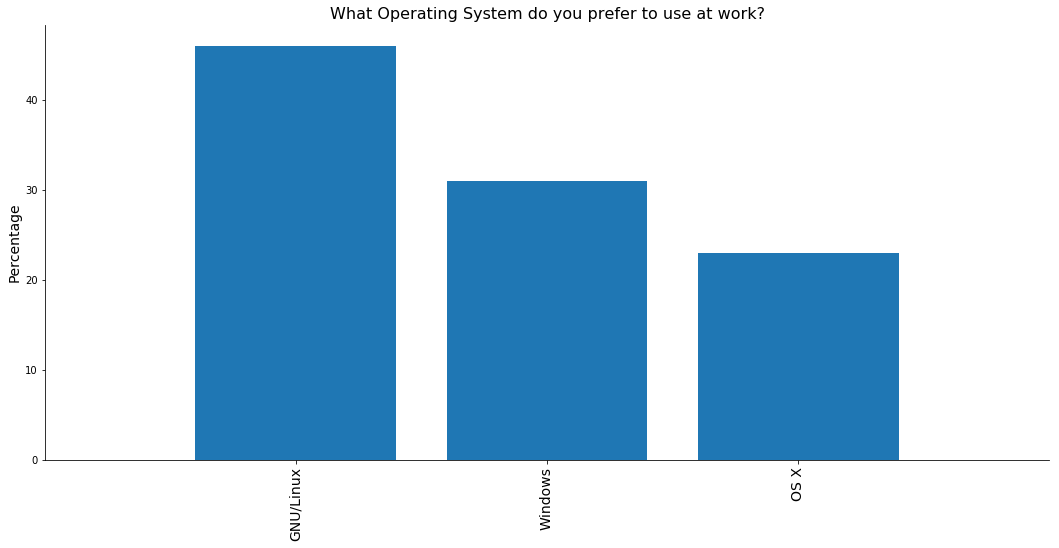

In [204]:
_ = get_plot(perc_to_count, "one choice")

### What are your three (3) favourite tools to manage project deliverables, keep track of progress, communicate with your project group(s)? (Please wirte a comma separated list, eg: Slack, Trello, Google Wave)

In [205]:
data = df['tool1zaf. What are your three (3) favourite tools to manage project deliverables, keep track of progress, communicate with your project group(s)? (Please wirte a comma separated list, eg: Slack, Trello, Google Wave)'].dropna()
data = [z.replace('/', '').replace(';', ',').replace('-', ' ').strip().lower() for z in data if z.strip().lower() not in ['none']]
print('There are {} propositions'.format(len(data)))
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]

There are 15 propositions


In [206]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    #if len(k[0]) > 4:
    print(k[0].title(), k[1])

Slack 8
Trello 2
Google Docs 2
Gitter 1
Trello And Slack 1
Skype 1
Bugzilla 1
Ms Project 1
Github 1
Jira 1
Irc 1
My Voice 1
Email 1
Researchgate 1
Nano 1
Atom 1
Less 1


(-0.5, 1499.5, 799.5, -0.5)

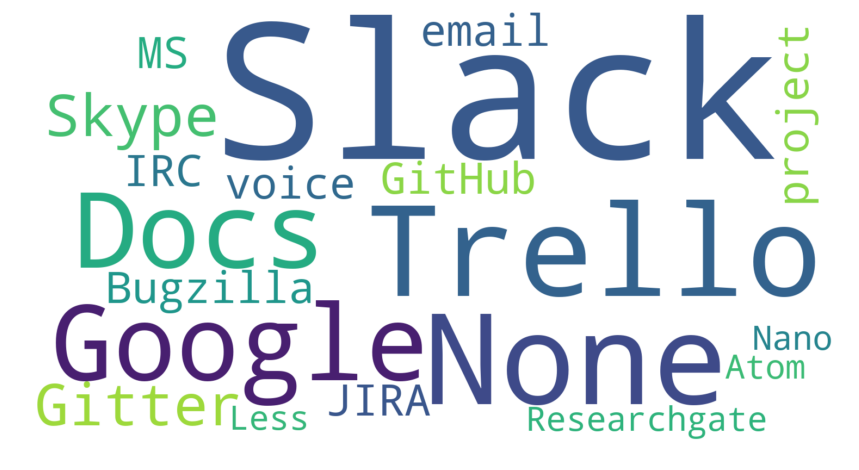

In [207]:
wc = wordcloud(df, ['tool1zaf. What are your three (3) favourite tools to manage project deliverables, keep track of progress, communicate with your project group(s)? (Please wirte a comma separated list, eg: Slack, Trello, Google Wave)'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Section 9: Job satisfaction
The job satisfaction is an essential pulse to take about the community. It helps to track the evolution and the current state of the RSEs within their role and to catch any sign of structural or organisational dysfunction that are translated into well-being. There are a lot of different metrics to measure the quality of a job on a personal and psychological level [4]. Several models exist to understand the link between different factors of job satisfaction and turnover intention [5]–[9]. Turnover intention is an important measure that is highly associated with the risk of employees leaving the organisation [7]. Job satisfaction is important in retaining RSEs. Perceived employability provides information on how workers values their own skills in regard of the market. To measure the different attitudes toward the RSE role, we used scales that have been created in [5], [6], [8], [9]. These are Likert scale [10], which are 5 point ordinal scales graduated from Strongly disagree to Strongly agree. Each scale is composed of several so called items (i.e. questions) that each measure one attitude.

Beside these specific concepts we asked more general question about their satisfaction in their current position and their satisfaction with their career in general with a range of answers from *0 - Not at all satisfied* to *10 - Completely satisfied*. 69% of the participants answered more than 5 to the scale (which can be considered as a neutral position) to the question about their satisfaction about their current position. For the question about their satisfaction with their career in general (and using the same scale), only one participants answered 0, the rest of the participants answered at least 5.

The specific questions about their job satisfaction reflect, in general, the same opinion as the two more generic questions. However, the granularity helps to identify a several issues that would not appears with generic questions:

* *The feedback about the performance*: These questions ask if the RSEs feel that they receive enough information about their work and their performance. While they seems to have enough information about the purpose of their work and having access to sufficient data and information, they are less assertive about the feedback they receive from their colleagues and their supervisors, mainly from the supervisors.

* *The turnover intention*: These questions aim to measure the desire to quit their current position. Overall, the participants are not willing to leave their position and are not necessarily searching for other job, even if the potential job would offer the same compensations. However, these positive signals about their job are tempered by the low score on the question "How often do you look forward to another day at work?".

* *The perceived employability*: This concept is linked to the previous one. People may not have the intention to leave their jobs, not because they like it, but because they fear they are not employable. This is not the case here, the participants consider themselves more often employable than not.=

* *The affective recognition*: This concept try to see if the participants receive positive feedback from their supervisors. Overall, again the participants report a positive relation with their supervisors. It means they are not systematic issues with direct management.

* *Affective satisfaction*: Here, the concept measures how much the participants enjoy and like their job. The answers were positive and again, reflect the answers given at the more generic questions.

* *The possibility of progression*: This question aims to study the possibility of evolution for the RSEs, if information is available and if they see a possibility of evolution within their current career. This is the only questions that clearly received negative answers. To summarise, even if the RSEs have planned to be in this position, as a part of their career plan, the majority of them think they cannot be promoted in their current group. Also, it seems unlikely their next position will be an RSE role which can be translate into a higher turnover in the following year. This risk is aggravated by the low bus factor and the absence of technical hand-over plan (see section 8).



## General satisfaction

### In general, how satisfied are you with your current position; In general, how satisfied are you with your career

In [208]:
v_to_count, filename  = get_count(df, ['likert3[satisGen1]. [In general, how satisfied are you with your current position]', 'likert3[satisGen2]. [In general, how satisfied are you with your career]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_satisfied_10.csv", "False", "./zaf/output/")

In [209]:
display(v_to_count) 

,"In general, how satisfied are you with your current position","In general, how satisfied are you with your career"
,,
0 - Not at all satisfied,1.0,1.0
1,NaN,NaN
2,1.0,NaN
3,1.0,NaN
4,NaN,NaN
5,1.0,NaN
6,1.0,4.0
7,3.0,3.0
8,3.0,3.0


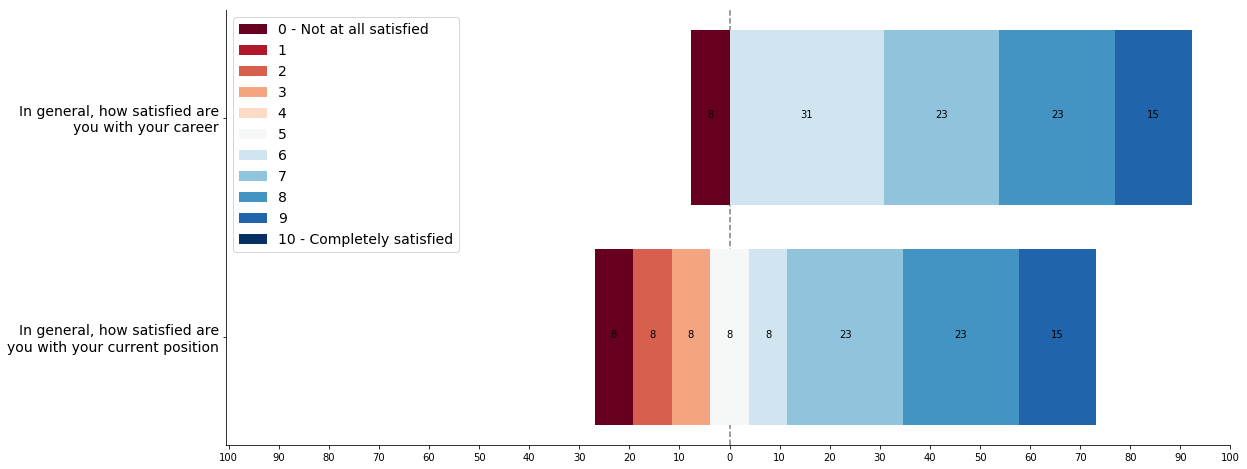

In [210]:
_ = get_plot(v_to_count, "likert")

## Feedback about performance

### Do you receive sufficient information on the results of your work?; Does your work give you the opportunity to check on how well you are doing your work?; In your work, do you have access to sufficient data and information?; Do you receive sufficient information on the purpose of your work?; Does your work provide you with direct feedback on how well you are doing your work?; Does your supervisor/line manager inform you about how well you are doing your work?; Do your colleagues inform you about how well you are doing your work?

In [211]:
v_to_count, filename  = get_count(df, ['likert1[perfCheck1]. [Do you receive sufficient information on the results of your work?]', 'likert1[perfCheck2]. [Does your work give you the opportunity to check on how well you are doing your work?]', 'likert1[perfCheck3]. [In your work, do you have access to sufficient data and information?]', 'likert1[perfCheck4]. [Do you receive sufficient information on the purpose of your work?]', 'likert1[perfCheck5]. [Does your work provide you with direct feedback on how well you are doing your work?]', 'likert1[perfCheck6]. [Does your supervisor/line manager inform you about how well you are doing your work?]', 'likert1[perfCheck7]. [Do your colleagues inform you about how well you are doing your work?]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_time_5.csv", "False", "./zaf/output/")

In [212]:
display(v_to_count) 

,Do you receive sufficient information on the results of your work?,Does your work give you the opportunity to check on how well you are doing your work?,"In your work, do you have access to sufficient data and information?",Do you receive sufficient information on the purpose of your work?,Does your work provide you with direct feedback on how well you are doing your work?,Does your supervisor/line manager inform you about how well you are doing your work?,Do your colleagues inform you about how well you are doing your work?
,,,,,,,
Never,1,1,NaN,NaN,1.0,3,1.0
Sometimes,4,5,3.0,2.0,4.0,2,5.0
Often,3,1,3.0,1.0,3.0,4,3.0
Very Often,4,6,6.0,9.0,6.0,4,5.0
Always,2,1,2.0,2.0,NaN,1,NaN


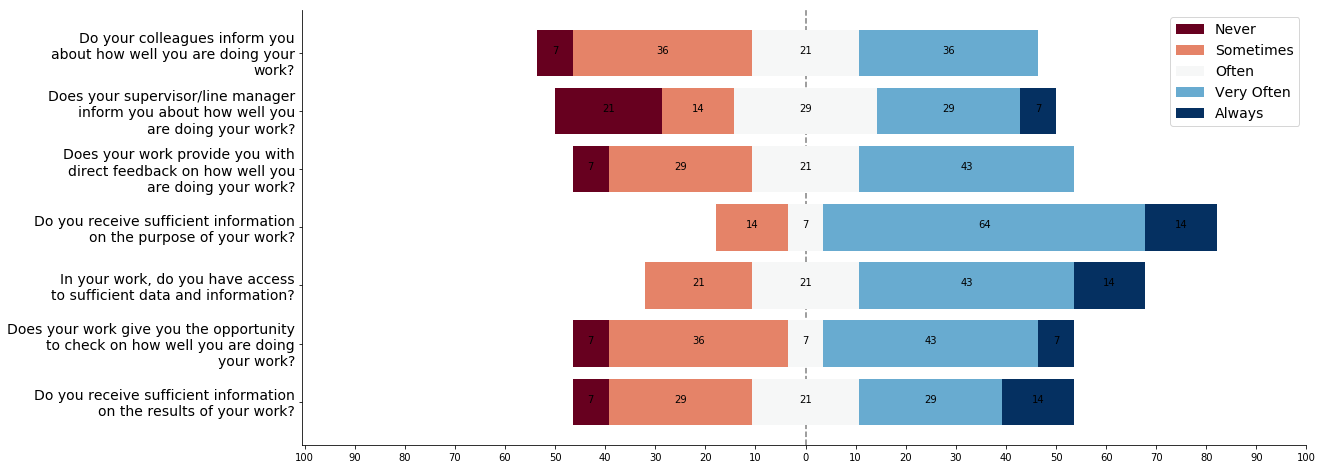

In [213]:
_ = get_plot(v_to_count, "likert")

## Turnover intention

### How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?; How often do you look forward to another day at work?; How often do you consider leaving your job?; How often do dream about getting another job that will better suit your needs?

In [214]:
v_to_count, filename  = get_count(df, ['likert1[turnOver1]. [How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?]', 'likert1[turnOver2]. [How often do you look forward to another day at work?]', 'likert1[turnOver3]. [How often do you consider leaving your job?]', 'likert1[turnOver4]. [How often do dream about getting another job that will better suit your needs?]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_time_5.csv", "False", "./zaf/output/")

In [215]:
display(v_to_count) 

,How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?,How often do you look forward to another day at work?,How often do you consider leaving your job?,How often do dream about getting another job that will better suit your needs?
,,,,
Never,2,3.0,7.0,4
Sometimes,5,10.0,6.0,4
Often,2,1.0,1.0,3
Very Often,4,NaN,NaN,1
Always,1,NaN,NaN,2


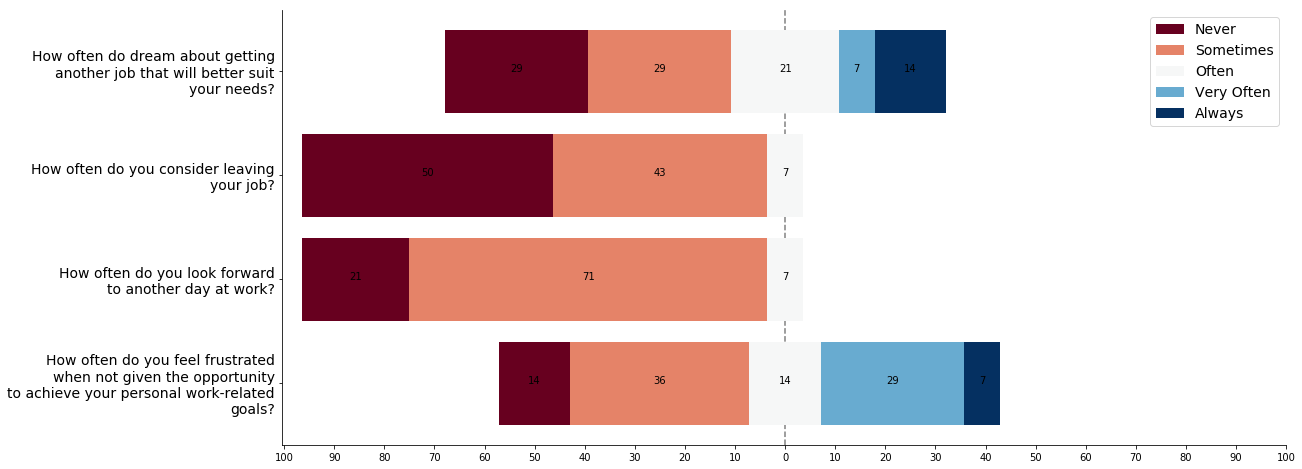

In [216]:
_ = get_plot(v_to_count, "likert")

### My current job satisfies my personal needs; I would accept another job at the same compensation level if I was offered it

In [217]:
v_to_count, filename  = get_count(df, ['likert2[turnOver5]. [My current job satisfies my personal needs]', 'likert2[turnOver6]. [I would accept another job at the same compensation level if I was offered it]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_agree.csv", "False", "./zaf/output/")

In [218]:
display(v_to_count) 

,My current job satisfies my personal needs,I would accept another job at the same compensation level if I was offered it
,,
Strongly disagree,3,3.0
Disagree,1,4.0
Neither agree or disagree,2,4.0
Agree,6,NaN
Strongly Agree,2,2.0


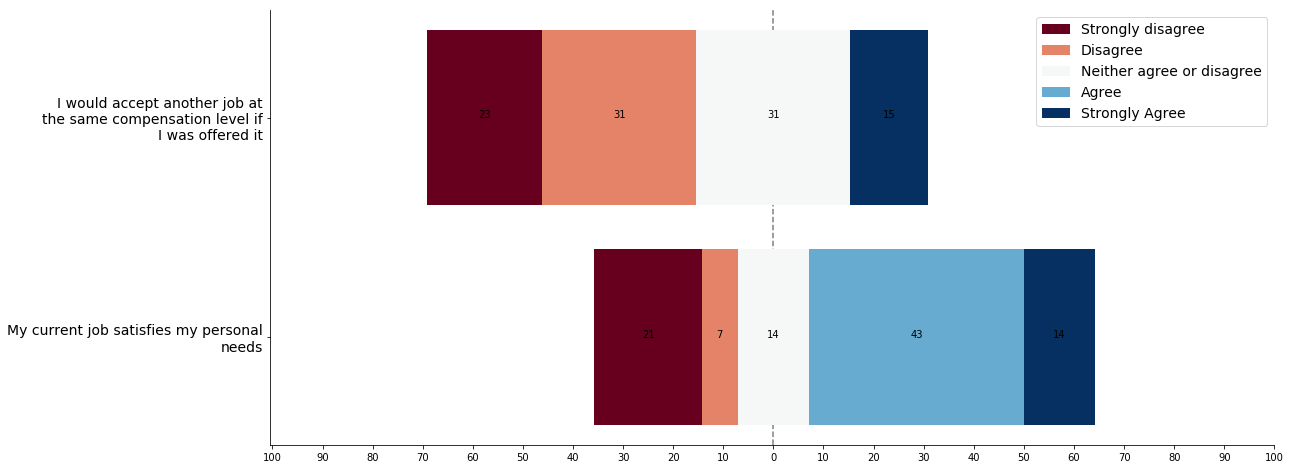

In [219]:
_ = get_plot(v_to_count, "likert")

## Perceived employability

### It would not be very difficult for me to get an equivalent job in a different organisation; I can think of a number of organisations that would probably offer me a job; My experience is in demand on the labour market; Given my qualifications and experience, getting a new job would not be very hard at all

In [220]:
v_to_count, filename  = get_count(df, ['likert2[percEmp1]. [It would not be very difficult for me to get an equivalent job in a different organisation]', 'likert2[percEmp2]. [I can think of a number of organisations that would probably offer me a job]', 'likert2[percEmp3]. [My experience is in demand on the labour market]', 'likert2[percEmp4]. [Given my qualifications and experience, getting a new job would not be very hard at all]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_agree.csv", "False", "./zaf/output/")

In [221]:
display(v_to_count) 

,It would not be very difficult for me to get an equivalent job in a different organisation,I can think of a number of organisations that would probably offer me a job,My experience is in demand on the labour market,"Given my qualifications and experience, getting a new job would not be very hard at all"
,,,,
Strongly disagree,2,1,1,2
Disagree,2,2,1,2
Neither agree or disagree,3,2,3,2
Agree,5,7,7,7
Strongly Agree,1,2,2,1


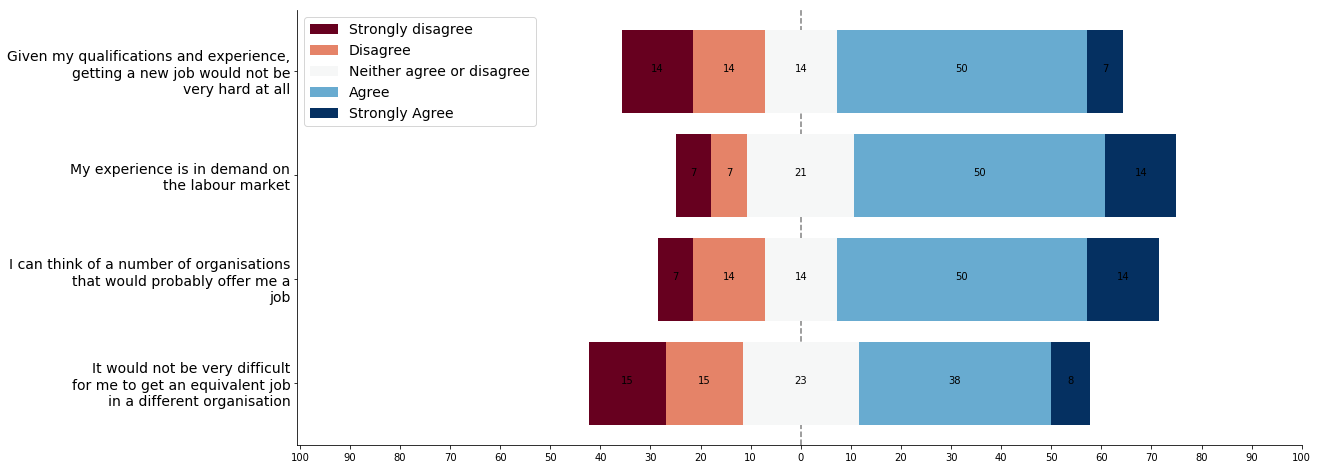

In [222]:
_ = get_plot(v_to_count, "likert")

## Affective recognition

### I am satisfied with my supervisor/line manager's confidence in me; I am satisfied with a word of thanks from my supervisor/line manager; I am satisfied with the recognition I receive from my supervisor/line manager for doing my job; I am satisfied with the compliments from my supervisor/line manager concerning my work; I am satisfied with the encouragement from my supervisor/line manager while doing my job

In [223]:
v_to_count, filename  = get_count(df, ["likert2[affRec1]. [I am satisfied with my supervisor/line manager's confidence in me]", 'likert2[affRec2]. [I am satisfied with a word of thanks from my supervisor/line manager]', 'likert2[affRec3]. [I am satisfied with the recognition I receive from my supervisor/line manager for doing my job]', 'likert2[affRec4]. [I am satisfied with the compliments from my supervisor/line manager concerning my work]', 'likert2[affRec5]. [I am satisfied with the encouragement from my supervisor/line manager while doing my job]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_agree.csv", "False", "./zaf/output/")

In [224]:
display(v_to_count) 

,I am satisfied with my supervisor/line manager's confidence in me,I am satisfied with a word of thanks from my supervisor/line manager,I am satisfied with the recognition I receive from my supervisor/line manager for doing my job,I am satisfied with the compliments from my supervisor/line manager concerning my work,I am satisfied with the encouragement from my supervisor/line manager while doing my job
Affective recognition,,,,,
Strongly disagree,2.0,2.0,2,1,2
Disagree,NaN,NaN,1,2,1
Neither agree or disagree,3.0,3.0,4,3,4
Agree,5.0,7.0,5,5,4
Strongly Agree,4.0,1.0,2,3,2


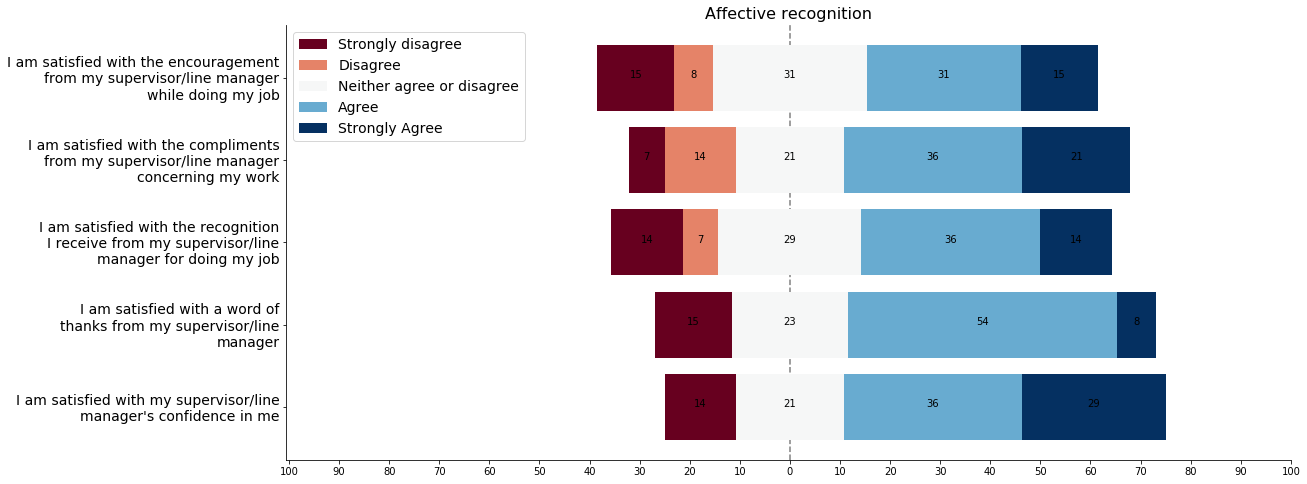

In [225]:
_ = get_plot(v_to_count, "likert")

## Affective satisfaction

### I find real enjoyment in my job; Most days I am enthusiastic about my job; I feel fairly well satisfied with my job; I like my job better than the average person

In [226]:
v_to_count, filename  = get_count(df, ['likert2[affSat1]. [I find real enjoyment in my job]', 'likert2[affSat2]. [Most days I am enthusiastic about my job]', 'likert2[affSat3]. [I feel fairly well satisfied with my job]', 'likert2[affSat4]. [I like my job better than the average person]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_agree.csv", "False", "./zaf/output/")

In [227]:
display(v_to_count) 

,I find real enjoyment in my job,Most days I am enthusiastic about my job,I feel fairly well satisfied with my job,I like my job better than the average person
,,,,
Strongly disagree,1,2.0,1,1
Disagree,2,NaN,3,1
Neither agree or disagree,1,3.0,1,1
Agree,7,6.0,7,8
Strongly Agree,3,2.0,2,3


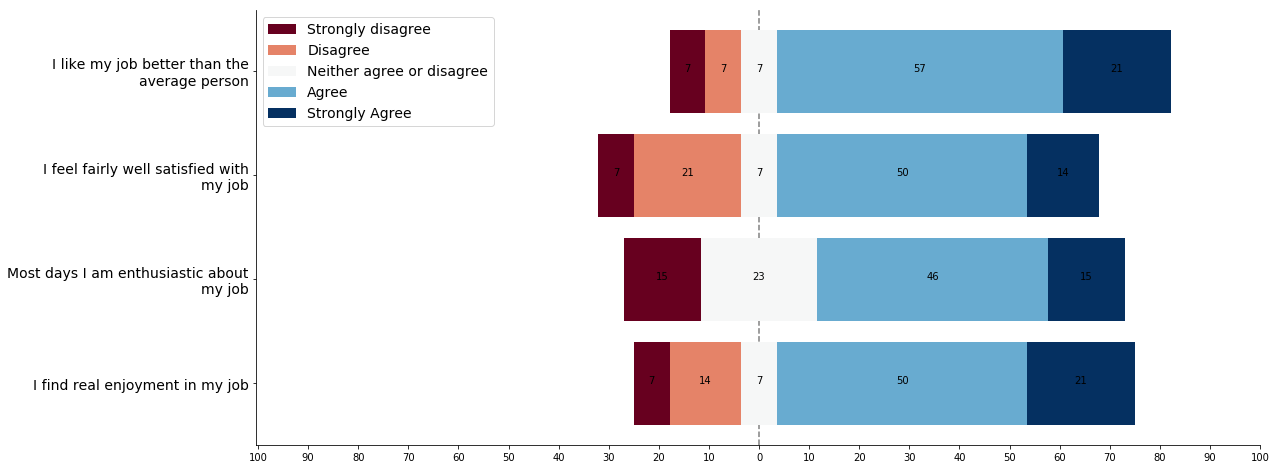

In [228]:
_ = get_plot(v_to_count, "likert")

## Possibility of progression

### It is likely that I will gain a promotion within my current group; The process I have to complete to gain a promotion is clear and understandable; There are many opportunities within my chosen career plan; My current position is an integral part of my career plan; It is likely that my next position will be an RSE role

In [229]:
v_to_count, filename  = get_count(df, ['likert2[progRSE1]. [It is likely that I will gain a promotion within my current group]', 'likert2[progRSE2]. [The process I have to complete to gain a promotion is clear and understandable]', 'likert2[progRSE3]. [There are many opportunities within my chosen career plan]', 'likert2[progRSE4]. [My current position is an integral part of my career plan]', 'likert2[progRSE5]. [It is likely that my next position will be an RSE role]'], "likert", "./../../survey_creation/2017/zaf/listAnswers/likert_agree.csv", "False", "./zaf/output/")

In [230]:
display(v_to_count) 

,It is likely that I will gain a promotion within my current group,The process I have to complete to gain a promotion is clear and understandable,There are many opportunities within my chosen career plan,My current position is an integral part of my career plan,It is likely that my next position will be an RSE role
,,,,,
Strongly disagree,4.0,3,3,1,3
Disagree,2.0,2,3,2,2
Neither agree or disagree,6.0,3,1,1,5
Agree,2.0,4,5,8,3
Strongly Agree,NaN,2,2,2,1


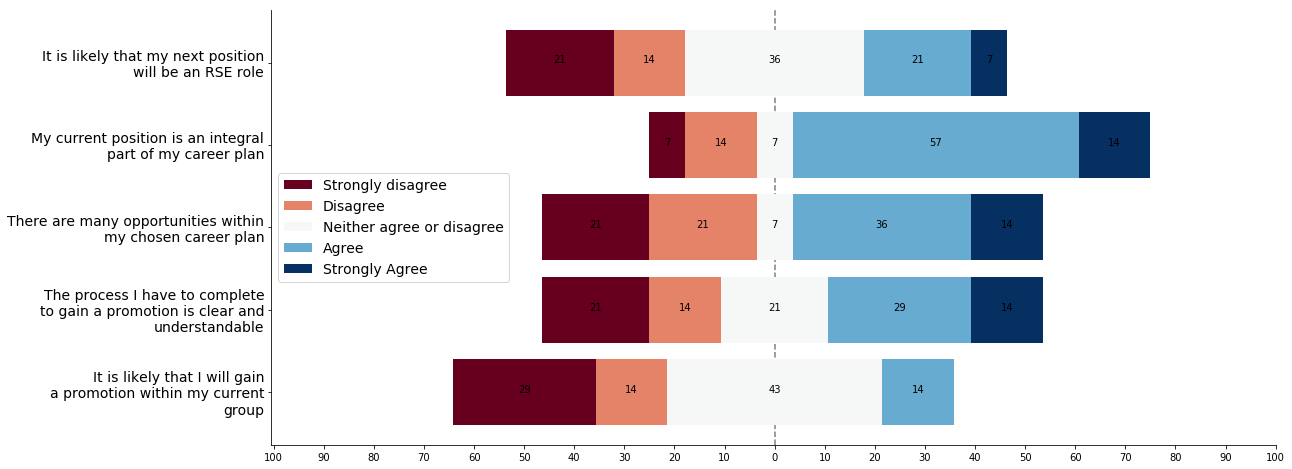

In [231]:
_ = get_plot(v_to_count, "likert")

# Section 10: Research Software Engineer
This last section regroups different questions about RSEs in general, the specific skills for them, where they meet other RSEs and the prospect of a conference in Germany. We asked them *how* they acquired the skills to become an RSE but also *which* skills they would like to acquire to become a better RSE. The propositions are listed and a wordcloud is proposed to see which are the most frequent words.
It seems the RSE learn their skills on their own through self-teaching or experience.

The last section was about the RSE networkt appears that the network is not really efficient yet. First, to the question where they meet other RSE, only  1 participant met them through the UKRSE Association (which, on later question, none of the participants mention to be part of it).
However, to the question if they would be interested in such organisation in South Africa, 62% (n=8) answered 'Yes'. In which organisation, what they will like the most would be the possibility to network and build a range of collaboration (both in research and software), the interestin training and job opportunities being the less important for them.


## Skills

### How did you learn the skills you need to become an RSE?

In [232]:
data = df['ukrse3. How did you learn the skills you need to become an RSE?'].dropna()
data = [z.replace('/', '').replace(';', ',').replace('-', ' ').strip().lower() for z in data if z.strip().lower() not in ['none']]
print('There are {} propositions'.format(len(data)))
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]

There are 10 propositions


In [233]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    #if len(k[0]) > 4:
    print(k[0].title(), k[1])

Self Study 2
University 1
Hobby As Child 1
Cs Undergrad 1
Phd Etc 1
Experience 1
Self Taught Augmented With Some University Training 1
Mostly Self Taught 1
Self Taught 1
Online Browsing 1
Undergraduate And Postgraduate Training Followed By Self Teaching 1


(-0.5, 1499.5, 799.5, -0.5)

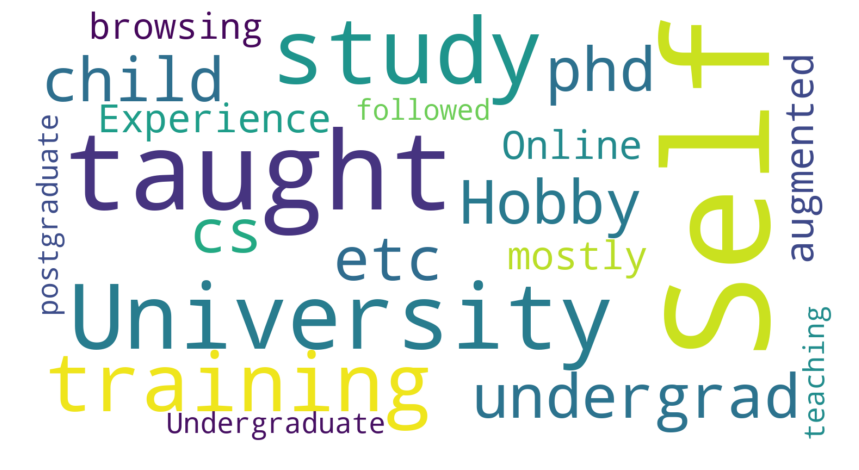

In [234]:
wc = wordcloud(df, ['ukrse3. How did you learn the skills you need to become an RSE?'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.

In [235]:
data = df['skill2. What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.'].dropna()
data = [z.replace('/', '').replace(';', ',').replace('-', ' ').strip().lower() for z in data if z.strip().lower() not in ['none']]
print('There are {} propositions'.format(len(data)))
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]

There are 11 propositions


In [236]:
results = dict()
for i in data:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    #if len(k[0]) > 4:
    print(k[0].title(), k[1])

Management 1
Database Models And Queries 1
Ajax + Rest Api 1
Julia 1
Machine Learning 1
Ann 1
Skill To Communicate Waste Of Taxpayers Money 1
Managing 1
Security 1
Time Management 1
Document Writing 1
Typing Speed 1
C++ Training 1
Agile Project Management Skills 1
Php Skills 1
Python 1
Programming Skills Especial In Python And R 1
Unit Testing 1
Effective Communication 1
Documentation 1


(-0.5, 1499.5, 799.5, -0.5)

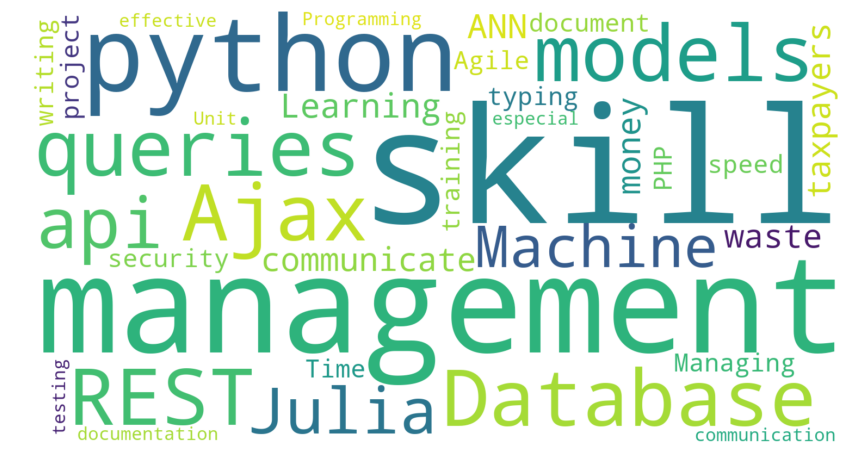

In [237]:
wc = wordcloud(df, ['skill2. What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## RSE network

### How do you meet other RSEs?

In [238]:
v_to_count, filename  = get_count(df, ['ukrse2[1]. How do you meet other RSEs? [UK RSE Association]', 'ukrse2[2]. How do you meet other RSEs? [N/A]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/ukrse.csv", "False", "./zaf/output/")

In [239]:
perc_to_count = get_percentage(v_to_count, filename)

In [240]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
How do you meet other RSEs?,,
N/A,9,90
UK RSE Association,1,10


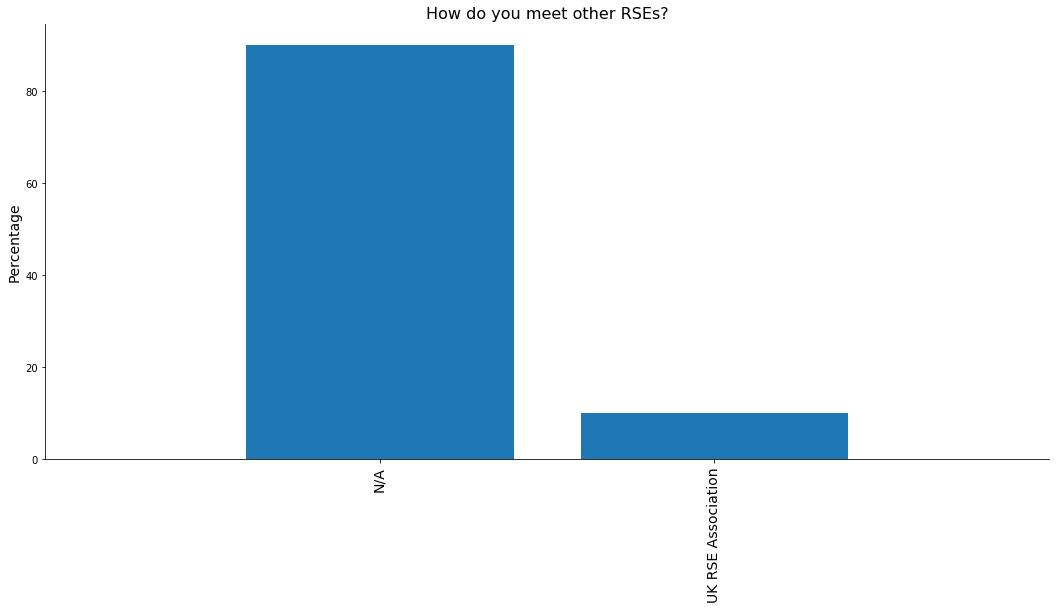

In [241]:
_ = get_plot(perc_to_count, "multiple choices")

### Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list)

In [242]:
v_to_count, filename  = get_count(df, ['ukrse1. Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list)'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [243]:
perc_to_count = get_percentage(v_to_count, filename)

In [244]:
display_side_by_side(v_to_count,perc_to_count)

,No [Count],Yes [Count],No [Percentage],Yes [Percentage]
Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list),,,,
Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list),13,0,100,0


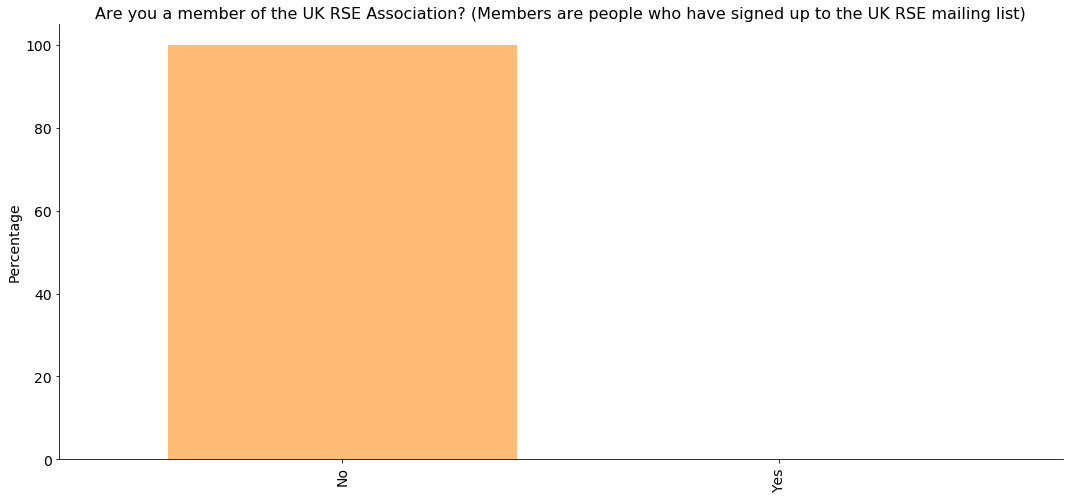

In [245]:
_ = get_plot(perc_to_count, "y/n/na")

### Would you be interested in joining such an organisation if one was formed in South Africa?

In [246]:
v_to_count, filename  = get_count(df, ['org1can. Would you be interested in joining such an organisation if one was formed in South Africa?'], "y/n/na", "./../../survey_creation/2017/zaf/listAnswers/.csv", "False", "./zaf/output/")

In [247]:
perc_to_count = get_percentage(v_to_count, filename)

In [248]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Would you be interested in joining such an organisation if one was formed in South Africa?,,,,,
Would you be interested in joining such an organisation if one was formed in South Africa?,8,5,9,62,38


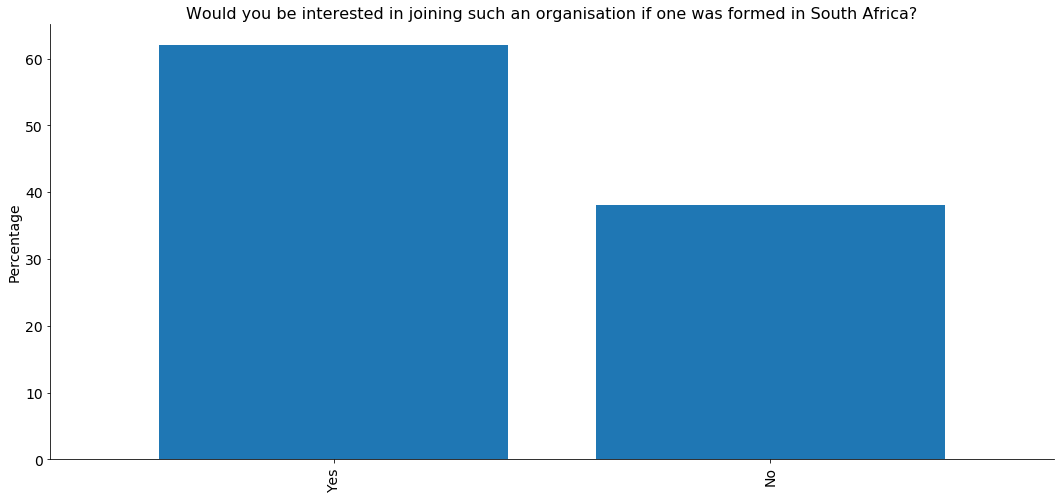

In [249]:
_ = get_plot(perc_to_count, "y/n/na")

### What would you hope to get out of such an organisation (check all that apply)?

In [250]:
v_to_count, filename  = get_count(df, ['org2can[1]. What would you hope to get out of such an organisation (check all that apply)? [Networking]', 'org2can[2]. What would you hope to get out of such an organisation (check all that apply)? [Software collaborations]', 'org2can[3]. What would you hope to get out of such an organisation (check all that apply)? [Research collaborations]', 'org2can[4]. What would you hope to get out of such an organisation (check all that apply)? [Training]', 'org2can[5]. What would you hope to get out of such an organisation (check all that apply)? [Research software standards and interoperability definition]', 'org2can[6]. What would you hope to get out of such an organisation (check all that apply)? [Job opportunities]'], "multiple choices", "./../../survey_creation/2017/zaf/listAnswers/rse_benefits.csv", "False", "./zaf/output/")

In [251]:
perc_to_count = get_percentage(v_to_count, filename)

In [252]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What would you hope to get out of such an organisation (check all that apply)?,,
Networking,5,21
Research collaborations,5,21
Software collaborations,4,17
Research software standards and interoperability definition,4,17
Training,3,12
Job opportunities,3,12


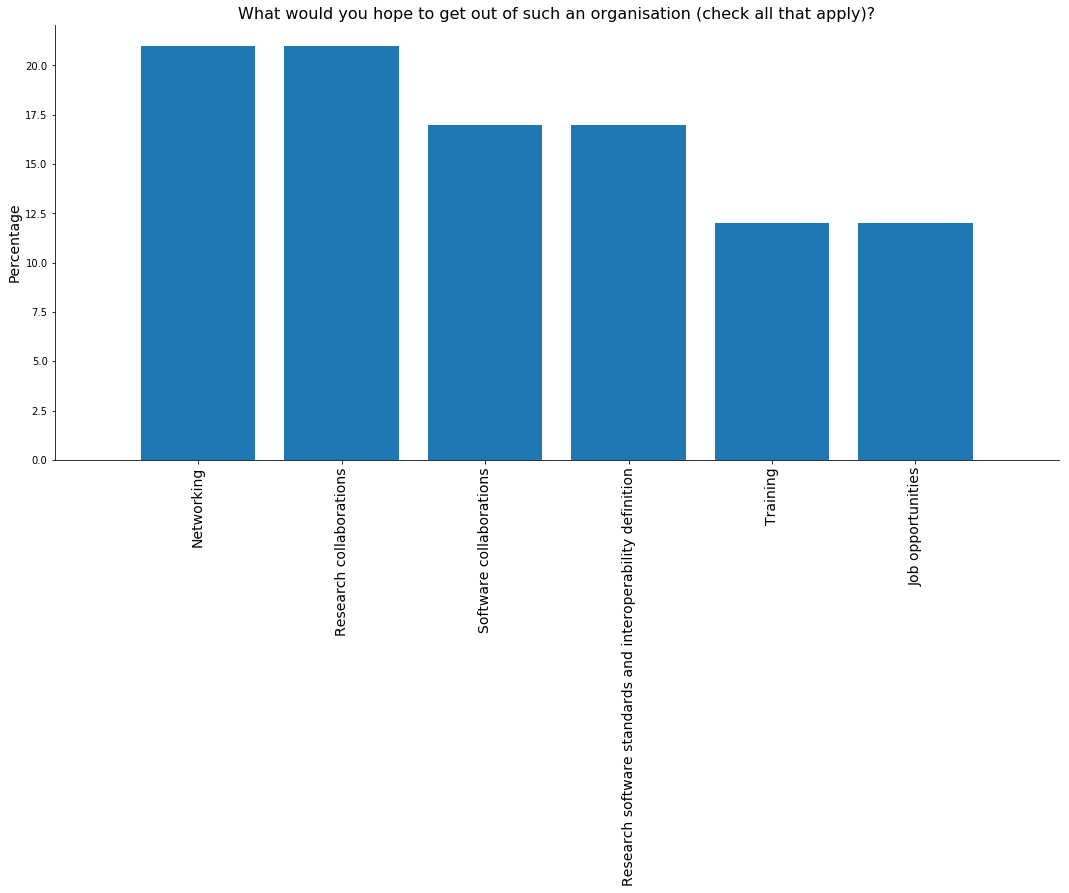

In [253]:
_ = get_plot(perc_to_count, "multiple choices")